# Melbourne Housing Market Pricing Model

Jacob St Pierre

## Contents
1. [Notebook Setup](#t1.)
2. [Introduction](#t2.)
* 2.1. [Data Dictionary](#t2.1.)
3. [Load Dataset](#t3.)
* 3.1. [Basic Data Information](#t3.1.)
* 3.2. [Finding Missing Data](#t3.2.)
4. [Melbourne Housing Map](#t4.)
5. [Exploratory Data Analysis](#t5.)
* 5.1.[Target Feature - Price](#t5.1.)
* 5.2.[Rooms](#t5.2.)
* 5.3.[Type](#t5.3.)
* 5.4.[Seller](#t5.4.)
* 5.5.[Method](#t5.5.)
* 5.6.[Date](#t5.6.)
* 5.7.[Distance](#t5.7.)
* 5.8.[Region Name](#t5.8.)
* 5.9.[Property Count](#t5.9)
* 5.10.[Bedroom](#t5.10.)
* 5.11.[Bathroom](#t5.11.)
* 5.12.[Car](#t5.12.)
* 5.13.[Postcode](#t5.13.)
* 5.14.[Land Size](#t5.14.)
* 5.15.[Building Area](#t5.15.)
* 5.16.[Year Built](#t5.16.)
* 5.17.[Council Area](#t5.17.)
* 5.18.[Suburb](#t5.18.)
6. [Missing Data](#t6.)         
7. [Feature Engineering](#t7.)  
8. [Feature Conversion](#t8.)    
9. [Feature Encoding](#t9.)      
10. [Model Building](#t10.)
* 10.1.[Construct Pipelines](#t10.1.)
11. [Regression Models](#t11.)
12. [Conclusion](#t12.)

<a id="t1."></a>
## Notebook Setup

In [1]:
# Import Libraries

# Data manipulation
import numpy as np
import pandas as pd
import datetime
import requests

# Data visualization
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Maps
import folium
from folium.plugins import MarkerCluster

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Impute missing data
from scipy import stats
from fancyimpute import IterativeImputer
from sklearn.impute import KNNImputer

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display='diagram')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression

<a id="t2."></a>
# Introduction

#### Problem Statement
The objective of this project is to answer a 2-part problem statement. Firstly can we provide a reliable and feasible recommendation algorithm to predict the average household price in the given dataset.  Lastly can we visualize the correlation between house features and the price to determine which ones affect price the most?

This problem can be solved by creating a reliable and feasible recommendation algorithm to predict the average price of a property in the Melbourne Area. The target value is the data column ‘Price’ within the Melbourne housing market dataset (Melbourne dataset). For predicting the actual price of the house we used the following regression models. 
- Linear Regression
- Random Forest Regressor
- Nearest Neighbours


#### Methodology
As we look at each feature and its relaitionship to our target feature 'Price' we will perform some common steps. For each feature we will:
- Visualize the count of variables (where applicable)
- Visualize its relationship to 'Price'
- Remove outliers, and then visualize the vairiable again (where applicable)
     - We have eleceted to use this method in our EDA, rather than when we construct our pipeline. This is because we want to visualize and better understand how removing outliers shapes the data. Also, the method of detecting and removing outliers will depend on the feature.
     - When dealing with outliers we want to preserve as much data as possible. Where possible and when removing outliers by percentile, we will only remove the top 1% of the feature
- Make key observations
    - One of these key observations will be regarding the features suitability for our model
    
#### Model Building

In order to simplify using the models, and to better mimic the real world application of models we wil be constructing pipelines to deploy the model. The pipelines, which will be described in more detail in a later section, will all generally follow the same steps:
- __Preprocessing__: In order for the data to be usable in models some preprocessing steps will take place. Here we can apply column transformers, dummy encoding, scaling of numerical features, and encoding ordinal features
- __Feature Selection__: This step will aloow us to perform a streamlines principal companent analysis or a chi2 test to find the most appropriate features for the model
- __Fit__: And the last automated step will be to fit the model to our trainind data

After completeing these steps then we can score and tune the models.

<a id="t2.1."></a>
# Data Dictionary
Explanation of key terms used to describe features in the dataset
- __Rooms__: Number of rooms
- __Price__: Price in dollars
- __Method__: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- __Type__: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
- __SellerG__: Real Estate Agent
- __Date__: Date sold
- __Distance__: Distance from CBD (city center)
- __Regionname__: General Region (West, North West, North, North east …etc
- __Propertycount__: Number of properties that exist in the suburb.
- __Bedroom2__: Scraped # of Bedrooms (from different source)
- __Bathroom__: Number of Bathrooms
- __Car__: Number of carspots
- __Landsize__: Land Size
- __BuildingArea__: Building Size
- __CouncilArea__: Governing council for the area

<a id="t3."></a>
# Load Dataset

In [2]:
# Load in dataset
df = pd.read_csv('melb_data.csv')
org_length = len(df)

<a id="t3.1."></a>
# Basic Data Information

In [3]:
# View dataframe
pd.set_option("display.max_columns", 40)
df.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
1  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
2  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   
3  4/03/2017       2.5    3067.0       3.0       2.0  1.0      94.0   
4  4/06/2016       2.5    3067.0       3.0       1.0  2.0     120.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN       Yarra   -37.7996    144.9984   
1          79.0     1900.0       Yarra   -37.8079    144.9934   
2         150.0     1900.0       Yarra   -37.8093    144.9944   
3           NaN        NaN       Yarra   -37.7969    144.9969   
4         142.0     2014.0       Yarra   -37.8072    144.9941   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

In [4]:
# Data feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
# Descriptive statistics of numeric values in dataset
df.describe().T

count          mean            std          min  \
Rooms          13580.0  2.937997e+00       0.955748      1.00000   
Price          13580.0  1.075684e+06  639310.724296  85000.00000   
Distance       13580.0  1.013778e+01       5.868725      0.00000   
Postcode       13580.0  3.105302e+03      90.676964   3000.00000   
Bedroom2       13580.0  2.914728e+00       0.965921      0.00000   
Bathroom       13580.0  1.534242e+00       0.691712      0.00000   
Car            13518.0  1.610075e+00       0.962634      0.00000   
Landsize       13580.0  5.584161e+02    3990.669241      0.00000   
BuildingArea    7130.0  1.519676e+02     541.014538      0.00000   
YearBuilt       8205.0  1.964684e+03      37.273762   1196.00000   
Lattitude      13580.0 -3.780920e+01       0.079260    -38.18255   
Longtitude     13580.0  1.449952e+02       0.103916    144.43181   
Propertycount  13580.0  7.454417e+03    4378.581772    249.00000   

                         25%            50%           75%           max  
Rooms               2.000000       3.000000  3.000000e+00  1.000000e+01  
Price          650000.000000  903000.000000  1.330000e+06  9.000000e+06  
Distance            6.100000       9.200000  1.300000e+01  4.810000e+01  
Postcode         3044.000000    3084.000000  3.148000e+03  3.977000e+03  
Bedroom2            2.000000       3.000000  3.000000e+00  2.000000e+01  
Bathroom            1.000000       1.000000  2.000000e+00  8.000000e+00  
Car                 1.000000       2.000000  2.000000e+00  1.000000e+01  
Landsize          177.000000     440.000000  6.510000e+02  4.330140e+05  
BuildingArea       93.000000     126.000000  1.740000e+02  4.451500e+04  
YearBuilt        1940.000000    1970.000000  1.999000e+03  2.018000e+03  
Lattitude         -37.856822     -37.802355 -3.775640e+01 -3.740853e+01  
Longtitude        144.929600     145.000100  1.450583e+02  1.455264e+02  
Propertycount    4380.000000    6555.000000  1.033100e+04  2.165000e+04

<a id="t3.2."></a>
# Finding Missing Data

Text(0.5, 1.0, 'Missing Data')

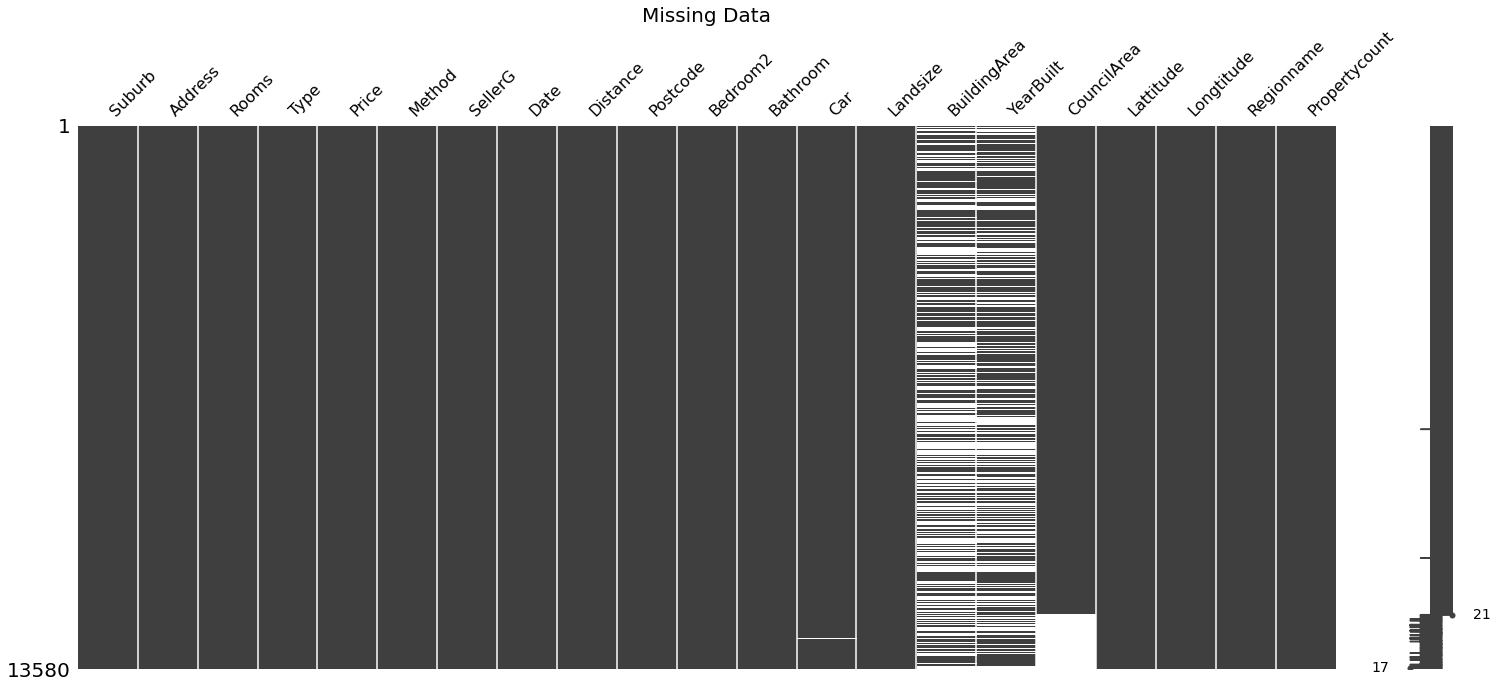

In [6]:
missingno.matrix(df)
plt.title('Missing Data',fontsize=20)

In [7]:
# Missing data counts
print('Count of null values:')
df.isnull().sum()

Count of null values:


Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

#### Observation
- After looking at the plot above, it is clear that the data is missing at random (MAR). Druing the imputing missing values stage of the project this means we can use a K-Neirest Neighbours (KNN) or Multiple Itteration Chained Equation (MICE) method. After exploring each feautre more closely and how it relates to price, the process of imputation can begin.

<a id="t4."></a>
# Melbourne Housing Map
### Locations of all properties

In [8]:
# Visualize the location of homes
latitude = -37.8136
longitude = 144.9631
m = folium.Map(location=[latitude, longitude],zoom_start=10)

In [9]:
# Create list of lat and long
loc = df[['Lattitude','Longtitude']]
# Cast to a list
loclist = loc.values.tolist()

In [10]:
# Create a map that clusters the data
# As you zoom in, you'll be able too see more and more locations
from folium import plugins

# Let's start with a clean copy of the map of Melbourne
melb_map = folium.Map(location = [latitude, longitude], zoom_start = 10)

# Instantiate a mark cluster object for the incidents in the dataframe
houses = plugins.MarkerCluster().add_to(melb_map)


# Loop through the dataframe and add each data point to the mark cluster
for lat, lng, in zip(df['Lattitude'], df['Longtitude']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        #popup=label,
    ).add_to(houses)

# display map
melb_map

<a id="t5."></a>
# Exploratory Data Analysis

<a id="t5.1."></a>
# Target Feature - Price
Price: Price in dollars

Text(0.5, 1.0, 'Distribution of Price')

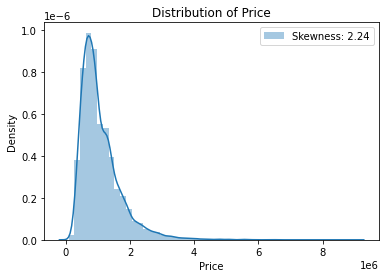

In [11]:
# View the distribution of Price
# We will use a dist plot price is a continous variable (technically)
sns.distplot(df['Price'], label = 'Skewness: %.2f'%(df['Price'].skew()));
plt.legend(loc = 'best')
plt.title('Distribution of Price')

Text(0.5, 0, 'Price in Millions ($)')

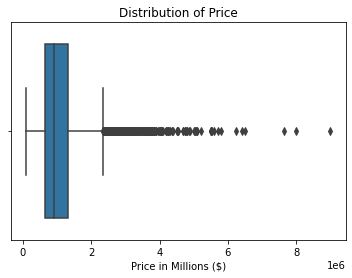

In [12]:
# View outliers
sns.boxplot(df['Price'])
plt.title('Distribution of Price')
plt.xlabel('Price in Millions ($)')

Text(0.5, 0, 'Price in Millions ($)')

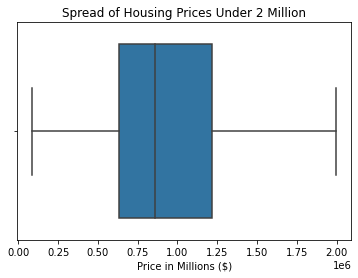

In [13]:
# Spread of prices under 2 million, where the majority of values are
a = df[df['Price']<2000000]
sns.boxplot(a['Price'])
plt.title('Spread of Housing Prices Under 2 Million')
plt.xlabel('Price in Millions ($)')

In [14]:
# Remove top 1% of properties by price
# Then check the distribution again
print(f"Length of dataset: {len(df)}")
df = df[df['Price'] < np.percentile(df['Price'],99)]
print(f"New length of dataset: {len(df)}")

Length of dataset: 13580
New length of dataset: 13444


Text(0.5, 1.0, 'Distribution of Price (After Outliers are Removed)')

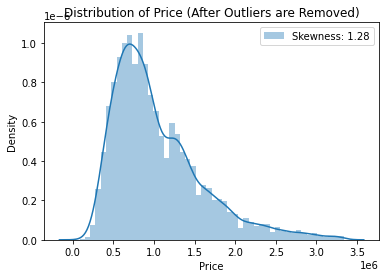

In [15]:
# View the distribution of Price after removing outliers
# We will use a dist plot price is a continous variable (technically)
sns.distplot(df['Price'], label = 'Skewness: %.2f'%(df['Price'].skew()));
plt.legend(loc = 'best')
plt.title('Distribution of Price (After Outliers are Removed)')

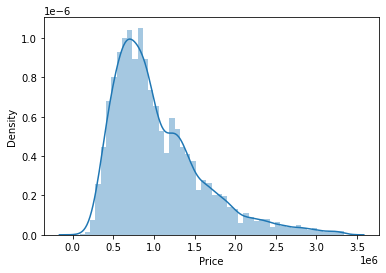

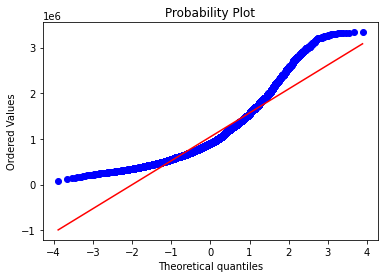

In [16]:
# Transformed histogram and normal probability plot
sns.distplot(df['Price']);
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)

#### Observation
- Initially we noticed that price had a strong right skewness with a long tail. However after removing the top 1% of properties the skewness drops considerably. 
- From the Probability Plot we can see again just how non evenly the price feature is distributed

In [17]:
# Correlation between numeric values
df[['Price','Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt']].corr()

Price     Rooms  Distance  Bedroom2  Bathroom       Car  \
Price         1.000000  0.506542 -0.159922  0.484990  0.442823  0.224948   
Rooms         0.506542  1.000000  0.305054  0.943511  0.585701  0.403174   
Distance     -0.159922  0.305054  1.000000  0.306127  0.140653  0.271216   
Bedroom2      0.484990  0.943511  0.306127  1.000000  0.577703  0.400018   
Bathroom      0.442823  0.585701  0.140653  0.577703  1.000000  0.310046   
Car           0.224948  0.403174  0.271216  0.400018  0.310046  1.000000   
Landsize      0.039730  0.024915  0.025224  0.024930  0.036922  0.025927   
BuildingArea  0.088448  0.120363  0.101416  0.118573  0.107174  0.093049   
YearBuilt    -0.350688 -0.057446  0.245649 -0.046160  0.168657  0.114808   

              Landsize  BuildingArea  YearBuilt  
Price         0.039730      0.088448  -0.350688  
Rooms         0.024915      0.120363  -0.057446  
Distance      0.025224      0.101416   0.245649  
Bedroom2      0.024930      0.118573  -0.046160  
Bathroom      0.036922      0.107174   0.168657  
Car           0.025927      0.093049   0.114808  
Landsize      1.000000      0.500179   0.040229  
BuildingArea  0.500179      1.000000   0.025730  
YearBuilt     0.040229      0.025730   1.000000

Text(0.5, 1.0, 'Correlation of Numeric Features to Price')

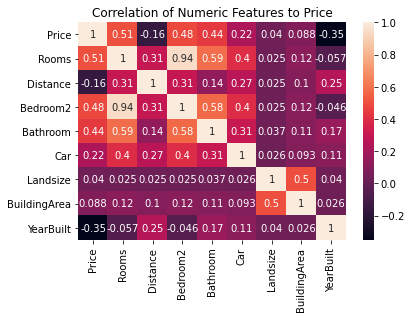

In [18]:
# View the correlation as a heatmap
# These correlations will change after we have imputed all the missing data
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['Price','Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt']].corr(),annot=True)
plt.title('Correlation of Numeric Features to Price')

#### Observation
- By looking at the heat map above we can determine that landsize and building area are not very strongly correlated to price. Meaning both smaller and larger properties can be expansive or cheaper
- The porperties distance from the city center has a slight correlation to price
- The strongest correlation come from the number of bedrooms and bathrooms, and number of rooms in general, in the context of the housing market this makes sense

# Distribution of Continuous Numeric Features

In [19]:
# List of numeric features for pairplot
df_numeric = pd.concat([df['Price'],df['Date'],df['Distance'],df['Landsize'],
                       df['BuildingArea'],df['Propertycount']],axis=1)

KeyboardInterrupt: 

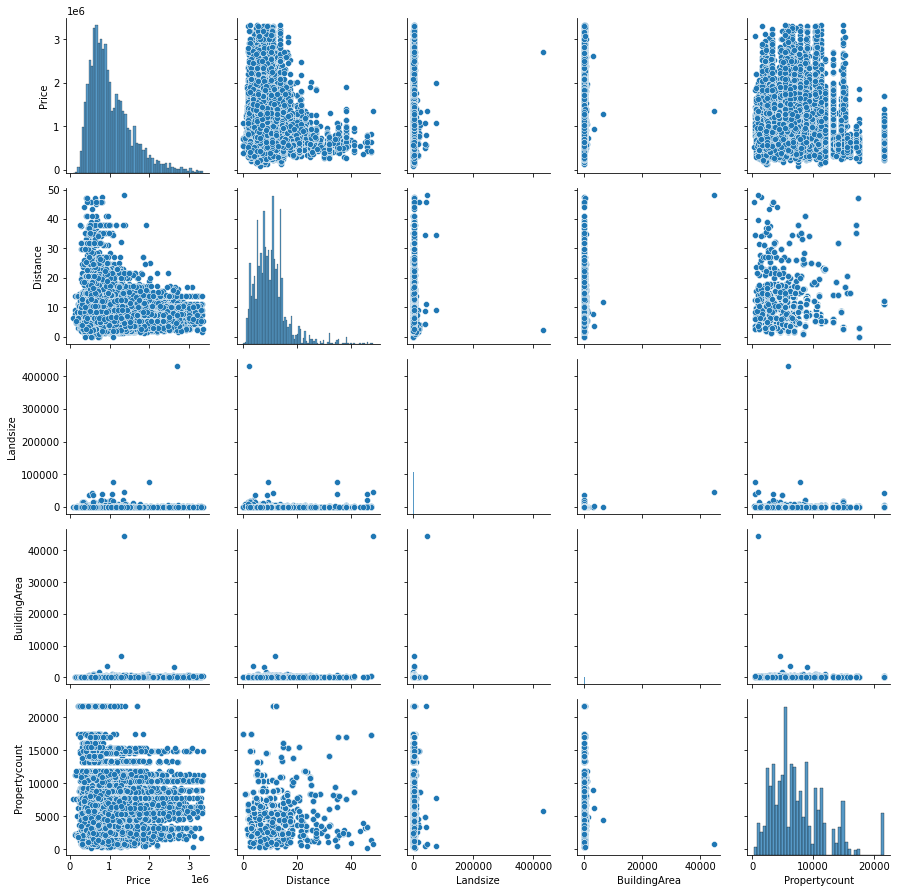

In [20]:
# Create pairplot of numeric features
sns.pairplot(df_numeric)
plt.title('Overview of Numerical Features')

<a id="t5.2."></a>
# Rooms
Rooms: Number of rooms

In [21]:
df['Rooms'].value_counts()

3     5861
2     3644
4     2626
1      681
5      551
6       63
7        9
8        8
10       1
Name: Rooms, dtype: int64

Text(0.5, 1.0, 'Distribution of Number of Rooms')

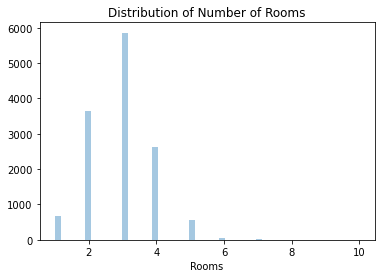

In [22]:
sns.distplot(df['Rooms'],kde=False);
plt.title('Distribution of Number of Rooms')

In [23]:
# Relationship between rooms and price
df[['Rooms','Price']].groupby(['Rooms'], as_index=False).mean().sort_values(by='Price',ascending=False)

Rooms         Price
6      7  1.684111e+06
4      5  1.679321e+06
5      6  1.623532e+06
7      8  1.602750e+06
3      4  1.382491e+06
2      3  1.065512e+06
8     10  9.000000e+05
1      2  7.714589e+05
0      1  4.338245e+05

Text(0, 0.5, 'Price ($)')

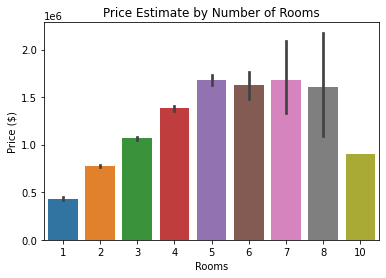

In [24]:
# Visualize the relationship
sns.barplot(x='Rooms',y='Price',data=df)
plt.title('Price Estimate by Number of Rooms')
plt.ylabel('Price ($)')

Text(0, 0.5, 'Region')

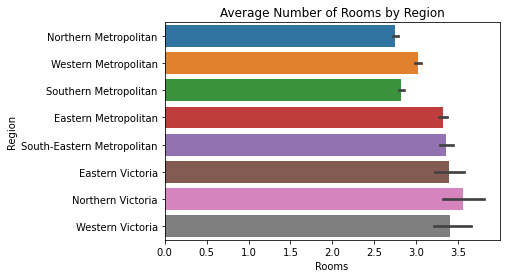

In [25]:
# Avergae number of rooms per region
sns.barplot(x='Rooms',y='Regionname',data=df)
plt.title('Average Number of Rooms by Region')
plt.ylabel('Region')

In [26]:
# Remove obvious outliers
# For our model we will remove properties with 7 or more rooms
print(f"Length of the dataframe before remvoing outliers: {len(df)}")
df = df[df['Rooms'] != 10]
df = df[df['Rooms'] != 8]
df = df[df['Rooms'] != 7]
print(f"New length of the dataframe: {len(df)}")

Length of the dataframe before remvoing outliers: 13444
New length of the dataframe: 13426


#### Observation
- The number of rooms per property appears to have a direct effect in the average price of the property
- It should have a strong correlation to price, and as such could remain as a feature in our model

<a id="t5.3."></a>
# Type
Type: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.


h    9298
u    3015
t    1113
Name: Type, dtype: int64


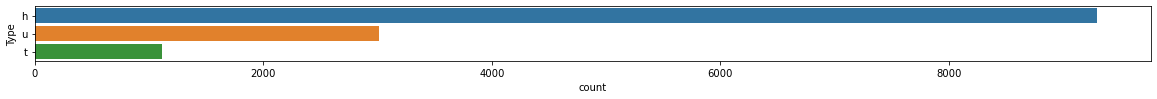

In [27]:
# Visualize the counts of each property type
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Type', data=df);
print(df['Type'].value_counts())

In [28]:
# Relationship between type and price
df[['Type','Price']].groupby(['Type'], as_index=False).mean().sort_values(by='Price',ascending=False)

Type         Price
0    h  1.199517e+06
1    t  9.314518e+05
2    u  6.035803e+05

Text(0, 0.5, 'Price ($)')

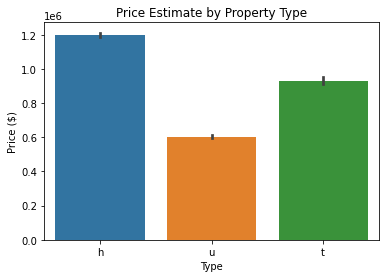

In [29]:
# Visualize the relationship
sns.barplot(x='Type',y='Price',data=df)
plt.title('Price Estimate by Property Type')
plt.ylabel('Price ($)')

#### Observation
- Homes account for the majority of properties sold by far
- Homes also have a much higher average price, which makes sense in the contex of real estate
- When building the model this feautre will be useful in predicting price. Also it will not require much work to prep for the model

<a id="t5.4."></a>
# Seller
SellerG: Real Estate Agent

In [ ]:
bst_sllr = df['SellerG'].value_counts()

In [ ]:
bst_sllr

#### Observation
- With 268 unique sellers, deriving useful inforamtion might be difficult. This becomes more apparent when we see just how many realtors/firms report under 10 sales
- At this stage the 'Seller' feature will not be part of the model

<a id="t5.5."></a>
# Method
Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

In [ ]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y='Method', data=df);
print(df['Method'].value_counts())

In [ ]:
# Relationship between method and price
df[['Method','Price']].groupby(['Method'], as_index=False).mean().sort_values(by='Price',ascending=False)

In [ ]:
# Visualize the relationship
sns.barplot(x='Method',y='Price',data=df)
plt.title('Price Estimate by Method')
plt.ylabel('Price ($)')

In [ ]:
# View sold by method with hue being type
plt.figure(figsize=(20,8))
sns.barplot(data=df,x='Method',y='Price',hue="Type");
plt.title('Average Price by Method and Property Type',fontsize=20)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45);

#### Observation
- The method in which the house is sold does not appear to have much affect on the average price
- If we plot by method and type of property we start to notice a trend, houses have a higher selling price
- The method feature on its own does not provide too much insight, but perhpas combining it with another column during feature engineering can yeild more insight

<a id="t5.6."></a>
# Date
Date: Date sold

In [ ]:
# Convert to date time object
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date'].nunique()

In [ ]:
# Distribution of Date
sns.distplot(df['Date']);
plt.title('Distribution of Date')

#### Observation
- The 'Date' feature alone does not provide much insight into the selling price of the house. During the feature enigneering stage of the project, we will look to find trends in year or month by property type or location. Byb doing this we can potentilly spot trends in the housing market.

<a id="t5.7."></a>
# Distance
Distance: Distance from Central Business District (CBD)

Given the fact the Melboure is a major metropolitan area, some assumptions can be made. Mostly that the further away from the CBD a property is the more the price will drop. We can explore that hypothesis in a few plots. 

In [ ]:
# View the distribution of Distance from the city center
# We will use a dist plot distance is a continous variable
sns.distplot(df['Distance'], label = 'Skewness: %.2f'%(df['Distance'].skew()));
plt.legend(loc = 'best')
plt.title('Distribution of Properties by Distance')

In [ ]:
# Create line plot showing distance vs price
# Bined the 'Distance' values to help declutter the plot
plt.figure(figsize = (12,6))
sns.regplot(data=df, x = 'Distance', y='Price',x_bins=50)
plt.title('Distance from City Center vs  Avg. Price', fontsize = 12)
plt.show()
plt.savefig('Distancplot.png',bbox_inches='tight',dpi=200)

#### Observation
- From the above two plots, we can see that generally speaking the further a property is located from the city center the lower its price will be (negative correlation). This proves the initial hypothesis. 
- Some properties that are located near the CBD do appear to have a lower price than ones slightly further away. This can be explained by the type of property, many properties close to the city center are townhomes or appartment units. As we have seen in this analysis the type of property plays a large role in determining the price.  
- In the first plot, the data does have a slight right skewness, with a long tail. Can look into using a log transfromation before we bin the data, but is might be unnecessary.

<a id="t5.8."></a>
# Region Name
Regionname: General Region (West, North West, North, North east …etc)

In [ ]:
# Visualize the counts
fig = plt.figure(figsize=(20,5))
sns.countplot(y='Regionname', data=df);
print(df['Regionname'].value_counts())

In [ ]:
# Visualize the relationship between average price and Regionname
sns.barplot(x='Regionname',y='Price',data=df)
plt.title('Price Estimate by Regionname')
plt.ylabel('Price ($)')
plt.xticks(rotation=45);

In [ ]:
# View sold by region with hue being type
plt.figure(figsize=(20,8))
sns.barplot(data=df,x='CouncilArea',y='Price',hue="Type");
plt.title('Average Price by Region Name and Property Type',fontsize=20)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45);

#### Observation
- The plot directly above tells us more about type than region. It shows that the type of property matters more in determining average price that location.
- In the plot depicting the average price by 'Regionname' a clear trend emerges. Those properties belonging to Metropolitain areas have a higher average price. Because of this, we will engineer a feature indicating whether or not it is in a metropolitian area


<a id="t5.9."></a>
### Property Count
Propertycount: Number of properties that exist in the suburb.

In [ ]:
df['Propertycount'].nunique()

In [ ]:
sns.distplot(df['Propertycount'], label = 'Skewness: %.2f'%(df['Propertycount'].skew()));
plt.legend(loc = 'best')
plt.title('Distribution of Properties by Propertycount')

#### Observation
- Deriving some meaning from this feature will require some feature engineering, perhaps at a later stage we will find some insights here

<a id="t5.10."></a>
# Bedroom
Bedroom: Number of Bedrooms

It is safe to assume that the more bedrooms a property has, the higher its price should be right? We will look to see if this is true, however we should also factor in location to this assumption.

In [ ]:
# Visualize the counts
fig = plt.figure(figsize=(20,4))
sns.countplot(y='Bedroom2', data=df);
print(df['Bedroom2'].value_counts())

In [ ]:
# Remove obvious outliers
# Also removing all '0' values

print(f"Length of the dataframe before remvoing outliers: {len(df)}")
df = df[df['Bedroom2'] != 10]
df = df[df['Bedroom2'] != 9]
df = df[df['Bedroom2'] != 20]
df = df[df['Bedroom2'] != 8]
df = df[df['Bedroom2'] != 7]
df = df[df['Bedroom2'] != 0]
print(f"New length of the dataframe: {len(df)}")

In [ ]:
# Relationship between method and price
df[['Bedroom2','Price']].groupby(['Bedroom2'], as_index=False).mean().sort_values(by='Price',ascending=False)

In [ ]:
# Visualize the relationship
sns.barplot(x='Bedroom2',y='Price',data=df)
plt.title('Price Estimate by Bedroom')
plt.ylabel('Price ($)')

#### Observation
- After removing the outliers a trend becomes obvious, the more bedrooms a property has the higher the average price. Our initial assumption remains true
- We still need to see the effect location has on this assumption. Once we have created a simpler way to express location, we can explore this relationship more.

<a id="t5.11."></a>
# Bathroom
Bathroom: Number of Bathrooms

In [ ]:
# Visualize the counts
fig = plt.figure(figsize=(20,4))
sns.countplot(y='Bathroom', data=df)
plt.title('Count of NUmber of Bathrooms');
print(df['Bathroom'].value_counts())

In [ ]:
# Relationship between method and price
df[['Bathroom','Price']].groupby(['Bathroom'], as_index=False).mean().sort_values(by='Price',ascending=False)

In [ ]:
# Visualize the relationship
sns.barplot(x='Bathroom',y='Price',data=df)
plt.title('Price Estimate by Number of Bathrooms')
plt.ylabel('Price ($)')

In [ ]:
# Remove obvious outliers
# Additionally after looking at the price estimate we can add those properties with '0' to '1', as it won't skew the data

df['Bathroom'].replace(0, 1, inplace=True)

print(f"Length of the dataframe before remvoing outliers: {len(df)}")
df = df[df['Bathroom'] != 6]
print(f"New length of the dataframe: {len(df)}")

#### Observation
- Much like the 'Bedroom' feature we expected a similar relaionship towards price

<a id="t5.12."></a>
# Car
Car: Number of parking spaces available

Once again we expect a very similar relationship towards price here, the more a property has the higher we expect the price to be. We would also expect a property closer to the central business district and in a metropolitian area to charge a premium for a parking space.

In [ ]:
# Check for missing values
print(f"Number of missing values: {df['Car'].isnull().sum()}")

In [ ]:
df['Car'].value_counts()

In [ ]:
# Visualize the counts
fig = plt.figure(figsize=(20,4))
sns.countplot(y='Car', data=df);

In [ ]:
# Relationship between method and price
df[['Car','Price']].groupby(['Car'], as_index=False).mean().sort_values(by='Price',ascending=False)

In [ ]:
# Visualize the relationship
sns.barplot(x='Car',y='Price',data=df)
plt.title('Price Estimate by Number of Car Parking Spots')
plt.ylabel('Price ($)')

In [ ]:
# Check for outliers
sns.boxplot(df['Car'])
plt.title('Distribution of Number of Parking Spaces')

In [ ]:
# Remove obvious outliers
print(f"Length of the dataframe before remvoing outliers: {len(df)}")
df = df[df['Car'] != 10]
df = df[df['Car'] != 9]
df = df[df['Car'] != 8]
df = df[df['Car'] != 7]
print(f"New length of the dataframe: {len(df)}")

In [ ]:
# Visualize the relationship
sns.barplot(x='Car',y='Price',data=df)
plt.title('Avergave Price by Number of Parking Spots')
plt.ylabel('Price ($)')

#### Observation
- After removing the outliers, the averagve price of the property by number of parking spaces is fairly consistent amoung all counts. Using this in the model as is could prove problematic, as there isn't much distinction between no spaces and 6.
- Perhaps engineering a feature which factors in the distance form the CBD can provide more context. As space is at a premimum the more central you get, having a parking space becomes a luxury. Finding a way to express this could allow the feature to become more uselful in determining the price.
- When we impute missing data later in the project we will address the 62 missing values. For these missing values we are going to assume that a missing data point actually represents no parking spot.

<a id="t5.13."></a>
# Postcode
Postcode associated with the property

In [ ]:
# Unique values for Postcode
df['Postcode'].nunique()

In [ ]:
# Missing values
print(f"Number of missing values: {df['Postcode'].isnull().sum()}")

In [ ]:
# View the distribution of Postcode
sns.distplot(df['Postcode'], label = 'Skewness: %.2f'%(df['Postcode'].skew()));
plt.legend(loc = 'best')
plt.title('Distribution of Postcode')

In [ ]:
# Average price for each postal code
table = pd.pivot_table(df, values=['Price'], index=['Postcode'],fill_value=0)

In [ ]:
# Reset index
table.reset_index(inplace=True)

In [ ]:
# Find ten highest and lowest
temp_table = table.nlargest(10,'Price')
temp_table1 = table.nsmallest(10,'Price')

In [ ]:
# Concat two dataframes
temp_table2 = pd.concat([temp_table,temp_table1], join='inner', ignore_index=True)

In [ ]:
# Plot top/bottom 10
sns.barplot(x='Postcode',y='Price',data=temp_table2)
plt.title('Ten Best and Worst Postal Code by Avg. Price')
plt.xticks(rotation=45);

### Observation
- After plotting the top and bottom 10 postal codes by average price, we can clearly see that it plays a role in the price of the house. This makes sense as other geographic indicators play a role in determining a house's price.
- Postcodes begining with 30 to 32 account for the most number of properties
- With just under 200 unique postcodes, we will need to group them by average price and bin the results in order to reduce dimensionality in the model.

<a id="t5.14."></a>
# Landsize
Landsize: Land Size

After some research, it was determined that Landsize was measured in square meters.

Landsize of 0:
- This indicates that it is a zero lot line house
- Having a value of 0 here is valid. In many types of properties the building comes up to the edge of the property line, or in some cases they are apartments

Text(0.5, 1.0, 'Distribution of Landsize')

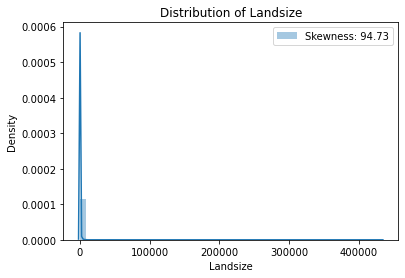

In [30]:
# View the distribution of Landsize
# We will use a dist plot because Landsize is a continous variable
sns.distplot(df['Landsize'], label = 'Skewness: %.2f'%(df['Landsize'].skew()));
plt.legend(loc = 'best')
plt.title('Distribution of Landsize')

In [ ]:
# Create a boxplot to visualize potential outliers
sns.boxplot(x=df['Landsize'])
plt.title('Distribution of Landsize')

#### Observation
- As we can see from the above plot, the data is very left skewed, but this seems to be the work of outliers
- Looking at this plot we can clearly see there are some outliers skewing the data. While they may represent actual propetries keeping them in the data set will cause problems when it comes to modeling

In [ ]:
# View top 10 properties by landsize
df.nlargest(15,'Landsize')

In [ ]:
# Remove top 1% of properties by price
# Then check the distribution again
print(f"Length of dataset: {len(df)}")
df = df[df['Landsize'] < np.percentile(df['Landsize'],99)]
print(f"New length of dataset: {len(df)}")

In [ ]:
# View new boxplot to visualize potential outliers
sns.boxplot(x=df['Landsize'])
plt.title('Distribution of Landsize')

In [ ]:
# New distribution
sns.distplot(df['Landsize'], label = 'Skewness: %.2f'%(df['Landsize'].skew()));
plt.legend(loc = 'best')
plt.title('Distribution of Landsize')

In [ ]:
# Check for linear correlation in Landsize and Price
plt.scatter(x=df['Landsize'], y=df['Price'])
plt.ylabel('Price')
plt.xlabel('Landsize')
plt.title('Landsize vs Price')
plt.show()

#### Observation
- After removing the top 1% of properties by landsize our distribution become slightly more normal. However, the majority of properties have a landsize of 0. This can be explained by the number of appartments and townhouses that do not have a yard
- When we construct the model and perform data transformations, we will perform a log transformation on this feautre to better the spread 

<a id="t5.15."></a>
# Building Area
BuildingArea: Building Size

After some research, it was determined that this feature was measured in square meters.

Additionally, anything under 27m2 (300 sq ft) is going to be considered an outlier and will be removed. While there might actually be properties sub this size, we are going to consider them typos or errors. 

In [ ]:
# Basic statistics
print(f"Number of unique values: {df['BuildingArea'].nunique()}")
print(f"Number of missing entries: {df['BuildingArea'].isnull().sum()}")
print(f"Percentage of missing values: {(((df['BuildingArea'].isnull().sum()))/len(df))*100:.2f}%")

Text(0.5, 1.0, 'Distribution of Building Area')

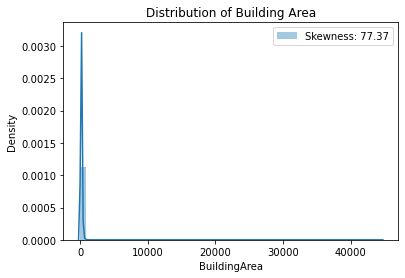

In [31]:
# Show the distribution of the building size
sns.distplot(df['BuildingArea'], label = 'Skewness: %.2f'%(df['BuildingArea'].skew()));
plt.legend(loc = 'best')
plt.title('Distribution of Building Area')

In [ ]:
sns.boxplot(df['BuildingArea'])

In [ ]:
# Find index of rows to drop
bs_indexrows = df.nlargest(7,'BuildingArea').index
bs_indexrows

In [ ]:
# Drop rows 
df.drop(labels=bs_indexrows,inplace=True)

In [ ]:
# Find smallest 100 properties by 'BuildingArea'
smlst = df.nsmallest(100,'BuildingArea')

In [ ]:
# Count of properties with >27 m2
smlst = smlst['BuildingArea'].value_counts()
smlst

In [ ]:
# While cumbersome I am going to employ the same method for removing rows with these values 
# Cannot use the percentil method, because we have so many null values 
print(f"Length of the dataset: {len(df)}")
df = df[df['BuildingArea'] != 3]
df = df[df['BuildingArea'] != 0]
df = df[df['BuildingArea'] != 2]
df = df[df['BuildingArea'] != 1]
df = df[df['BuildingArea'] != 18]
df = df[df['BuildingArea'] != 4]
df = df[df['BuildingArea'] != 25]
df = df[df['BuildingArea'] != 20]
df = df[df['BuildingArea'] != 19]
df = df[df['BuildingArea'] != 26]
df = df[df['BuildingArea'] != 5]
df = df[df['BuildingArea'] != 13]
df = df[df['BuildingArea'] != 14]
df = df[df['BuildingArea'] != 15]
df = df[df['BuildingArea'] != 16]
df = df[df['BuildingArea'] != 22]
df = df[df['BuildingArea'] != 12]
df = df[df['BuildingArea'] != 11]
df = df[df['BuildingArea'] != 10]
df = df[df['BuildingArea'] != 9]
df = df[df['BuildingArea'] != 7]
df = df[df['BuildingArea'] != 21]
df = df[df['BuildingArea'] != 27]
print(f"New length of the dataset: {len(df)}")

In [ ]:
# Show the distribution of the building size
sns.distplot(df['BuildingArea'], label = 'Skewness: %.2f'%(df['BuildingArea'].skew()));
plt.legend(loc = 'best')
plt.title('Distribution of Building Area (After Outliers)')

In [ ]:
# Scatter plot showing the buildingArea size vs Price
plt.scatter(x=df['BuildingArea'], y=df['Price'])
plt.ylabel('Price')
plt.xlabel('BuildingArea')
plt.title('BuildingArea vs Price')
plt.show()

#### Observation
- With just about half of the data missing here, it is imperative to the model to impute the missing data accurately
- By removing some outliers, when imputing the missing data our model for this will be more accurate
- Also some of the properties are under 20 or so square meters, this would be an incredibly small property, and could be a mistake in the data
- It does appear that BuildingArea and Price share a linear relationship

<a id="t5.16."></a>
# YearBuilt
YearBuilt: The year the property finished construction

In [ ]:
# Basic statistics
print(f"Number of unique values: {df['YearBuilt'].nunique()}")
print(f"Number of missing entries: {df['YearBuilt'].isnull().sum()}")
print(f"Percentage of missing values: {(((df['YearBuilt'].isnull().sum()))/len(df))*100:.2f}%")

In [ ]:
# Show the distribution of YearBuilt
sns.distplot(df['YearBuilt'], label = 'Skewness: %.2f'%(df['YearBuilt'].skew()));
plt.legend(loc = 'best')
plt.title('Distribution of YearBuilt')

In [ ]:
# View the data, and check outliers
sns.boxplot(x=df['YearBuilt'])
plt.title('IQR of YearBuilt')

In [ ]:
# Find all years before 1880
f = df['YearBuilt'].unique()
f.sort()
f[0:14]

In [ ]:
# Remove the major outlier of 1196 and 1830
# Using this method as selecting all values above 1830 removes Nan values
# Will also check how this changes the shape/length of the data
# Again using this method as to avoid any problem with Nan values
print(f"Length of the dataset before droping rows: {len(df)}")
df = df[df['YearBuilt'] != 1196]
df = df[df['YearBuilt'] != 1830]
df = df[df['YearBuilt'] != 1850]
df = df[df['YearBuilt'] != 1854]
df = df[df['YearBuilt'] != 1856]
df = df[df['YearBuilt'] != 1857]
df = df[df['YearBuilt'] != 1860]
df = df[df['YearBuilt'] != 1862]
df = df[df['YearBuilt'] != 1863]
df = df[df['YearBuilt'] != 1868]
df = df[df['YearBuilt'] != 1870]
df = df[df['YearBuilt'] != 1872]
df = df[df['YearBuilt'] != 1875]
df = df[df['YearBuilt'] != 1877]
print(f"New length: {len(df)}")

In [ ]:
# View again
sns.boxplot(x=df['YearBuilt'])
plt.title('IQR of YearBuilt')

In [ ]:
# Show the distribution of YearBuilt
# Skewness: %.3f'%(df['YearBuilt'].skew() show the accurancy ie .2 is 2 decimals
sns.distplot(df['YearBuilt'], label = 'Skewness: %.2f'%(df['YearBuilt'].skew()));
plt.legend(loc = 'best')
plt.title('Distribution of YearBuilt')

#### Observation
- After removing the obvious outliers, the data become less skewed
- With almost 40% of the data points missing for this column, finding a way to impute these values will be necessary
    - Will need to find how strongly YearBuilt correlates with Price
    - To help fill the missing data, will need to determine which features correlate closely with the year the property was built. Most likely we will use a KNN approach

<a id="t5.17."></a>
# CouncilArea
CouncilArea: Governing council for the area

In [ ]:
# Basic statistics
print(f"Number of unique values: {df['CouncilArea'].nunique()}")
print(f"Number of missing entries: {df['CouncilArea'].isnull().sum()}")
print(f"Percentage of missing values: {(((df['CouncilArea'].isnull().sum()))/len(df))*100:.2f}%")

In [ ]:
# Visualize the counts
fig = plt.figure(figsize=(20,8))
sns.countplot(y='CouncilArea', data=df)
plt.title('CouncilArea Counts');

In [ ]:
# Relationship between CouncilArea and price
df[['CouncilArea','Price']].groupby(['CouncilArea'], as_index=False).mean().sort_values(by='Price',ascending=False)

In [ ]:
# Visualize the relationship
sns.barplot(x='CouncilArea',y='Price',data=df)
plt.title('Price Estimate by CouncilArea')
plt.ylabel('Price ($)')
plt.xticks(rotation=45);

#### Observation
- With 10% of the data missing, and understanding how CouncilArea correlates to price imputing this data is going to be necessary for an accurate model
    - Removing the row would reduce the size of the data more than we would like
- To fill these values we will base the imputing off of the 'Postcode' feature. Postal codes are directly related to the council area that a property is located in
- During feature engineering, we will group this feature according to average price. This will allow us to make bins that have some meaning for our model.

<a id="t5.18."></a>
## Suburb

In [ ]:
# Number of unique suburbs
df['Suburb'].nunique()

In [ ]:
# Visualize the relationship between suburb and price
fig = plt.figure(figsize=(20,8))
sns.barplot(x='Suburb',y='Price',data=df)
plt.title('Price Estimate by Suburb')
plt.ylabel('Price ($)')
plt.xticks(rotation=45);

In [ ]:
# Average price for each postal code
table3 = pd.pivot_table(df, values=['Price'], index=['Suburb'],fill_value=0)

In [ ]:
# Reset index
table3.reset_index(inplace=True)

In [ ]:
# Find ten highest and lowest
temp_table3 = table3.nlargest(10,'Price')
temp_table4 = table3.nsmallest(10,'Price')

In [ ]:
# Concat two dataframes
temp_table5 = pd.concat([temp_table3,temp_table4], join='inner', ignore_index=True)

In [ ]:
# Plot top/bottom 10
sns.barplot(x='Suburb',y='Price',data=temp_table5)
plt.title('Top/Bottom Suburb by Price')
plt.xticks(rotation=45);

#### Observation
- From the above plot it is clear that the Suburb in which the property resides does play a role in the price
- When looking at the plot showing avergae price by all suburbs, it really illustrates the amount of outliers and variance in price for each suburb. However, treating each suburb individually may not be the best way forward
- With over 300 unique suburbs, perhaps grouping this feature by price and creaitng bins will reduce dimensionality in the model

<a id="t6."></a>
# Missing Data
In order to complete our analysis, and to build a more accurate model we need to first fill in missing data where we can. The following features have missing data:
- Car: 62
- BuildingArea: 6450
- Year Built: 5375
- CouncilArea: 1369

To impute this missing data we are going to apply a few different techniques based on the type of variable and the amount of data missing. Again our goal here it it impute as much missing data as possible and keep as many observations as we can however, we need maintain accuracy while doing this. We can judge a successful imputation by checking the distribution of the feature after imputing missing data and compare it to the distribution with missing data.

## Car
For this feature there are only 62 missing data points. This does not comprise a large portion of the dataset. To fill these values we can apply a bit of common sense. We can assume that if this field was left empty, then that signals there is no parking space available. 

In [32]:
# Car
df['Car'].value_counts()

2.0     5522
1.0     5489
0.0     1022
3.0      727
4.0      475
5.0       59
6.0       51
8.0        8
7.0        7
10.0       3
9.0        1
Name: Car, dtype: int64

In [33]:
# For missing values we will input the min or zero
df['Car'].fillna(value=0.0,inplace=True)
print(f"New number of missing values is {df['Car'].isnull().sum()}")

New number of missing values is 0


## BuildingArea and YearBuilt
These two features contain a problematic amount of missing data. Both features contain upwards of 40% missing data, so some imputation methods will not work here. Simply imputing the mean, median, or mode would skew the data too much. Additionally, using a log conversion then performing the same method would still skew the data, just slightly less. We will treat each feature seperatly and use a different method of imputation for each.

## YearBuilt
To impute the missing values here we will use the KNN method. 

Text(0.5, 1.0, 'Correlation of Numeric Features to YearBuilt')

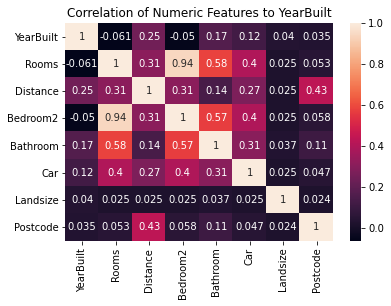

In [34]:
# View the correlation of numeric features to 'YearBuilt'
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['YearBuilt','Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Postcode']].corr(),annot=True)
plt.title('Correlation of Numeric Features to YearBuilt')

#### Observation
- It appears that all the numeric features have very little to no correlation to 'YearBuilt'
- To impute these missing values however, we will use KNN
- Using this approach is best here because:
    - The imputer will look for rows with similar values to the row with missing feature. It will then impute the missing year with the value from a similar row

In [35]:
df['YearBuilt'].describe()

count    8100.000000
mean     1964.858765
std        37.129388
min      1196.000000
25%      1940.000000
50%      1970.000000
75%      1999.000000
max      2018.000000
Name: YearBuilt, dtype: float64

Text(0.5, 1.0, 'Distribution of YearBuilt')

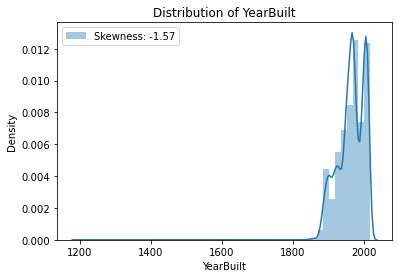

In [36]:
# Show the distribution of YearBuilt
sns.distplot(df['YearBuilt'], label = 'Skewness: %.2f'%(df['YearBuilt'].skew()));
plt.legend(loc = 'best')
plt.title('Distribution of YearBuilt')

In [37]:
# Use KNN to impute missing data in 'YearBuilt'
x = df[['YearBuilt','Landsize','Distance','Rooms','Bedroom2','Bathroom',]]
impute_knn = KNNImputer(n_neighbors=6)
df[['YearBuilt','Landsize','Distance','Rooms','Bedroom2','Bathroom']] = impute_knn.fit_transform(df[['YearBuilt','Landsize','Distance','Rooms','Bedroom2','Bathroom']])


In [38]:
df['YearBuilt'].describe()

count    13426.000000
mean      1963.423221
std         32.527046
min       1196.000000
25%       1947.208333
50%       1965.500000
75%       1987.000000
max       2018.000000
Name: YearBuilt, dtype: float64

Text(0.5, 1.0, 'Distribution of YearBuilt (Post Imputation)')

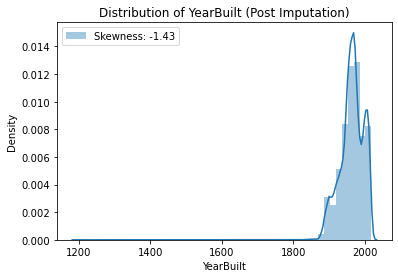

In [39]:
# Show the distribution of YearBuilt after imputation
sns.distplot(df['YearBuilt'], label = 'Skewness: %.2f'%(df['YearBuilt'].skew()));
plt.legend(loc = 'best')
plt.title('Distribution of YearBuilt (Post Imputation)')

#### Observation
- Using the KNN method for imputing missing data was successful here
- Looking at both the basic desciprtive statistics and distribution plot before and after imputing missing data we can see that the newly filled data points are not skewing the data

## BuildingArea
To maintain accuracy of our model we will employ the multiple iteration by chained equation (MICE) method. This method models each feature in the datset with missing values ('BuildingArea') as a function to other features and uses that estimate for imputation. It is done in an iterated manner and we have told the model to run through a maximum of 100 times. With each iteration of this linear regression model it rotates through each feature alternating between training and testing.

Text(0.5, 1.0, 'Correlation of Numeric Features to BuildingArea')

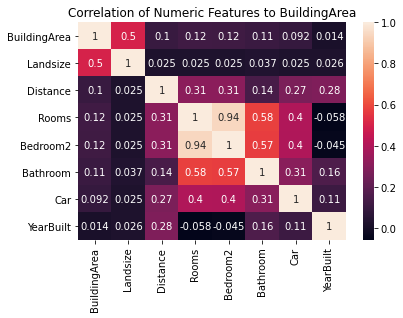

In [40]:
# View the correlation as a heatmap
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['BuildingArea','Landsize','Distance','Rooms','Bedroom2','Bathroom','Car','YearBuilt']].corr(),annot=True)
plt.title('Correlation of Numeric Features to BuildingArea')

Text(0.5, 1.0, 'Distribution of YearBuilt (Post Imputation)')

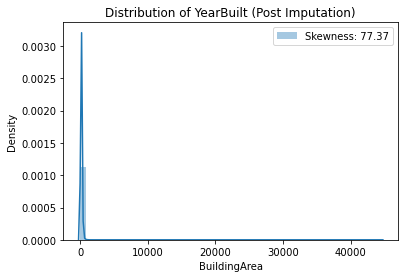

In [41]:
# Show the distribution of YearBuilt after imputation
sns.distplot(df['BuildingArea'], label = 'Skewness: %.2f'%(df['BuildingArea'].skew()));
plt.legend(loc = 'best')
plt.title('Distribution of YearBuilt (Post Imputation)')

In [42]:
# Reset index of dataframe
# This will be important when we merge our new data with the existing data
df.reset_index(inplace=True)

In [43]:
df.drop(labels='index',axis=1,inplace=True)

In [44]:
# Creating a list of the columns we want to use in our model for imputing missing data
c = df[['Rooms','Distance','Postcode','Bedroom2','Bathroom','Landsize','BuildingArea','YearBuilt']].copy()

In [45]:
# Instantiate the model
# Setting min and max values to better represent our model, limiting the min to 27, as that is where outliers were cut

# Copy dataset
c_mice_imputed = c.copy()

# Initialize IterativeImputer
mice_imputer = IterativeImputer(max_iter=100,sample_posterior=True,n_nearest_features=6,initial_strategy='most_frequent',
                                min_value=27,max_value=900)

# Impute using fit_tranform on diabetes
c_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(c)

In [ ]:
# Save As CSV Post Imputation
#c_mice_imputed.to_csv('MICE_Imputed_Data.csv')
# Can utilized saved csv if the above MICE impoter cannot run
#c_mice_imputed = read_csv('MICE_Imputed_Data.csv')

In [ ]:
# Check for null values and see if the model imputed the missing values
c_mice_imputed.isnull().sum()

In [ ]:
# Basic descriptive statistics before and after imputing missing values
print('Before:')
print(df['BuildingArea'].describe())
print('-'*30)
print('After:')
print(c_mice_imputed['BuildingArea'].describe())

In [ ]:
# Show the distribution of YearBuilt after imputation
sns.distplot(c_mice_imputed['BuildingArea'], label = 'Skewness: %.2f'%(c_mice_imputed['BuildingArea'].skew()));
plt.legend(loc = 'best')
plt.title('Distribution of BuildingArea (Post Imputation)')

#### Observation
- After imputing the missing data and comparing the feature before and after we can see that the distribution hasn't changed too much 

### Reintegrate the new column values into our dataset

In [ ]:
# Create new dataframe
df_imp = pd.concat([df,c_mice_imputed], axis=1)

In [ ]:
df_imp.columns

In [ ]:
# Create list of new feature labels
new_col_label = ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'Seller',
       'Date', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Rooms1',
       'Distance1', 'Postcode1', 'Bedroom21', 'Bathroom1', 'Landsize1',
       'MICE_BuildingArea','Mice_YB']

In [ ]:
# Apply new labels
df_imp.columns=new_col_label

In [ ]:
# Drop columns with missing data, using our new values instead
df_imp.drop(labels=['Rooms1','Distance1', 'Postcode1', 'Bedroom21', 'Bathroom1', 'Landsize1','BuildingArea','Mice_YB'],
      axis=1,inplace=True)

In [ ]:
# Check for null values
# Only CouncilArea is missing data
df_imp.isnull().sum()

### CouncilArea
For this feature we are going to impute missing data by utilizing the postcode feature. Using the postcode here is applicable because it directly relates to the council area.

In [ ]:
# Convert postcode to int type
df_imp['Postcode'] = df_imp['Postcode'].astype(int)

In [ ]:
# Find and store all null rows based on 'CouncilArea'
v = df_imp[df_imp['CouncilArea'].isnull()]

In [ ]:
# View nulls alongside 'Postcode', this is to see if the nulls belong to only a few postcodes
v[['Postcode','CouncilArea']]

In [ ]:
# Create subset of data that houses null and non-null council area values
# This will allow for comparison to imupte missing data
ca_empty = df_imp[df_imp['CouncilArea'].isnull()]#ca
ca_full = df_imp[df_imp['CouncilArea'].notnull()]# cb

In [ ]:
# Function to compare the two sets and replace missing values
for i in list(ca_empty.index):
    if (ca_empty['Postcode'][i] in list(ca_full['Postcode'])):
        x = ca_full[ca_full['Postcode']== ca_empty['Postcode'][i]].index[0]
        ca_empty['CouncilArea'][i] = ca_full.iloc[x]['CouncilArea']

In [ ]:
# Merge datasets
df_full = pd.merge(ca_empty,ca_full,how='outer')

In [ ]:
# Check for new null values
df_full['CouncilArea'].isnull().sum()

In [ ]:
# Check for potential outliers/one offs
df_full['CouncilArea'].value_counts()

In [ ]:
# Remove the 2 null values 1 unknown and 1 moorabool
df_full = df_full[df_full['CouncilArea'].notnull()]
df_full = df_full[df_full['CouncilArea'] != 'Unavailable']
df_full = df_full[df_full['CouncilArea'] != 'Moorabool']

### Final Check for missing values

In [ ]:
missingno.matrix(df_full)
plt.title('Check for Missing Values')

In [ ]:
# List of numeric features for pairplot
df_numeric1 = pd.concat([df_full['Price'],df_full['Distance'],df_full['Landsize'],
                       df_full['MICE_BuildingArea'],df_full['YearBuilt']],axis=1)

# Create pairplot of numeric features
sns.pairplot(df_numeric1)
plt.title('Overview of Numerical Features');

In [ ]:
# New size of the dataset
print(f"Length of dataset originally: {org_length}")
print(f"New length of dataset: {len(df_full)}")
print(f"A reduction of: {(org_length-len(df_full))} rows")
print(f"Accounting for a reduction of: {((org_length-len(df_full))/org_length)*100:.2f}% of the data")


#### Observation
- All data imputations are now complete

In [ ]:
# To print out completed dataset
#df_full.to_csv('Melbourne_Housing_Data_Full.csv')

<a id="t7."></a>
# Feature Engineering
Having now imputed all our missing data, we can begin the process of feature engineering. Through this process we look to combine or infer information from existing columns to create new columns. In this section we will create many new columns, but also check their relevance and correlation to our target feature. If they are ultimately not significant, or they would just add noise to our model, they will be omitted from the final dataset.


Feature we will create:
- Street Suffix (StreetSuf): the type of street the property is on (ie, street, road, ave)
- Bedrooms and Bathrooms (BedBath): combining the number of bedrooms and bathrooms located in a property
    - The goal of this feature is two fold:
        - Reduce the potential effects of multicollinearity
        - Reduce dimensionality while increasing correlation with price
- Year: Year the property was sold
- Month: Month the property was sold
    - Looking to see if the Year or Month a property correlates with price
    - Additionally having the 'Year' feature will help with creating another feature
- Building Age (BuildingAge): A measure of how old the building is
    - Similar to the Yearbuilt
- InnerCityParking: similar to the 'Car' feature, but with an important difference. It measures if it contains a parking spot and is in the city

### Feature - StreetSuf
Using the address column in our model is not feasable, as there are only unique enteries. However, we can pull just the street suffix (st, ln, pl) from this column. After doing this we can examine if it is correlated with price.

In [ ]:
# Create new column by slicing from within the Address column
# Using '-1' here as the suffix is at the end, this way streets with multiple word for length won't be a problem
df_full['StreetSuf'] = df_full['Address'].apply(lambda x: x.split(' ')[-1])

In [ ]:
# Inspect new column
df_full.tail(2)

In [ ]:
# Table to pull street suffix from
web = requests.get('https://meteor.aihw.gov.au/content/index.phtml/itemId/270020')
dfs = pd.read_html(web.text) 

In [ ]:
# Find the table
for i in dfs:
    print(i.head(1))

In [ ]:
# Extract the data needed
st_abv1 = i[0]
st_abv2 = i[1]

In [ ]:
# Convert above series to dataframe
st_abv1.to_frame()
st_abv2.to_frame()

# Concat data and clean up the table
st_abv = pd.concat([st_abv1, st_abv2], axis=1)
st_abv.columns = st_abv.iloc[0]
st_abv.drop(st_abv.index[0],inplace=True) 
st_abv.reset_index(inplace=True)
st_abv.drop(labels='index',axis=1,inplace=True)
st_abv.drop(st_abv.index[[27,28]],inplace=True)
st_abv.set_index('Abbreviation',inplace=True)
st_abv.head()

In [ ]:
# Save as a csv so we don't pull from the web everytime we need it
st_abv.to_csv('Au_Street_ABV.csv')

In [ ]:
# Load in csv
st_abv = pd.read_csv('Au_Street_ABV.csv')
st_abv = st_abv.set_index('Abbreviation')
st_abv.head()

In [ ]:
# Create variable to house spelling mistakes and statsitically small occurances
Other = ('Crofts','Ridge','Victoria','Woodland','Grand','Res','Corso','Athol','Righi','Grange','Terrace',
         'Strand','Glade','Nook', 'Gdns', 'Victoria','Dell', 'Eyrie', 'Gra', 'Summit','Loop','East',
         'Eyrie','N','GRN','Crossway','S','W','E','Outlook','Cove','Qy','Grn','Mews','Fairway','Grove','Cir')
AV = ('Av','Avenue')
HWY = ('Highway','Hts')
CR = ('Crescent','Cr')
ESP = ('Esp','Esplanade')
BVD = ('Boulevard')
PDE = ('Parade')

In [ ]:
# Replace values
df_full['StreetSuf'].replace(Other,'Other',inplace=True)
df_full['StreetSuf'].replace(AV,'Ave',inplace=True)
df_full['StreetSuf'].replace(HWY,'Hwy',inplace=True)
df_full['StreetSuf'].replace(CR,'Cres',inplace=True)
df_full['StreetSuf'].replace(ESP,'Esp',inplace=True)
df_full['StreetSuf'].replace(BVD,'Bvd',inplace=True)
df_full['StreetSuf'].replace(PDE,'Pde',inplace=True)

In [ ]:
# New value counts of simplification
df_full['StreetSuf'].value_counts()

In [ ]:
# Create dictionary from extracted table
abbv_dict = st_abv[['Street Type']].to_dict()
abbv_dict = abbv_dict['Street Type']

# Add in key and value for 'Other'
# And view dictionary
x = {'Other':'Other'}
abbv_dict.update(x)
abbv_dict

In [ ]:
# Map new dictionary to column
df_full['StreetSuf'] = df_full['StreetSuf'].map(abbv_dict) 

In [ ]:
# View new feeature
df_full

In [ ]:
# Find correlation between StreetSuf and Price
df_full[['StreetSuf','Price']].groupby(['StreetSuf'], as_index=False).mean().sort_values(by='Price',ascending=False)

In [ ]:
# Visualize the relationship
sns.barplot(x='StreetSuf',y='Price',data=df_full)
plt.title('Price Estimate by CouncilArea')
plt.ylabel('Price ($)')
plt.xticks(rotation=45);

In [ ]:
df_full['StreetSuf'].value_counts()

#### Observation
- There is some variation in average price and street suffix. However there is a large range in the values, especially for Esplanade.

# BedBath
During the initial exploratory data analysis,we discovered that some features were closely related to price and eachother. The number of rooms, bathrooms, and bedrooms are closely related.


In [ ]:
# Create new column by adding bed and bath
df_full['BedBath'] = (df_full['Bedroom']+df_full['Bathroom'])

In [ ]:
# View data with new column
df_full.head()

In [ ]:
# View the correlation as a heatmap
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df_full[['Price','Rooms','Bedroom','Bathroom','BedBath']].corr(),annot=True)
plt.title('Correlation of All Rooms to Pirce')
#plt.savefig('Correlation of all rooms to price.png',bbox_inches='tight',dpi=200)

#### Observation
- The correlation between bedrooms,rooms, and bathrooms to price is very similar. In order to prevent multicollinearity we will feature engineer one column to better express this
- After creating a column which combines number of bedrooms and bathooms we see that it has the strongest correlation to price. To help simplify our model we could remove the following features:
    - Rooms
    - Bedroom
    - Bathroom

In [ ]:
# View average price by new 'BedBath' feature
# It appears to be a much more accurate predictor of price
sns.barplot(x='BedBath',y='Price',data=df_full)
plt.title('Price Estimate by Suburb')
plt.ylabel('Price ($)')
plt.xticks(rotation=45);

In [ ]:
# Checking for potential multicollinearity
fig = plt.figure(figsize=(10,8))

plt.title('Finding Multicollinearity\n',fontsize=20,loc='center')

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

data_1 = pd.concat([df_full['Price'],df_full['Bathroom']],axis=1)
data_2 = pd.concat([df_full['Price'],df_full['Rooms']],axis=1)
data_3 = pd.concat([df_full['Price'],df_full['Bedroom']],axis=1)
data_4 = pd.concat([df_full['Price'],df_full['BedBath']],axis=1)


ax1.scatter(x='Bathroom', y='Price',data=data_1)
ax2.scatter(x='Rooms',y='Price',data=data_2)
ax3.scatter(x='Bedroom', y='Price',data=data_3)
ax4.scatter(x='BedBath', y='Price',data=data_4)

ax1.set_title('Bathroom vs Price')
ax1.set_xlabel('Numer of Bathrooms')
ax1.set_ylabel('Price')

ax2.set_title('Rooms vs Price')
ax2.set_xlabel('Number of Rooms')
ax2.set_ylabel('Price')

ax3.set_title('Bedroom vs Price')
ax3.set_xlabel('Number of Bedrooms')
ax3.set_ylabel('Price')

ax4.set_title('BedBath vs Price')
ax4.set_xlabel('Number of BedBath')
ax4.set_ylabel('Price')
plt.savefig('Correlation of all rooms to price.png',bbox_inches='tight',dpi=300)

#### Observation
- The above multi plot looks to highlight just how similar the distribution of the freatures to price. We can clearly see that 'Rooms' and 'Bedroom' are almost identical, with 'Bathroom' being very similar as well.

# Year and Month
Adding two more features (year and month) to the data set. Then we can examine if there is a correlation between the month or year the property sold. If it is determined that the year the property was sold doesn't play a major role in determining price it will be omitted from the final dataset. If we had more years of data, the year feature would be useful for determining if ther was a housing bubble.

In [ ]:
# Additional 'Date' column information
df_full['Month'] = df_full['Date'].dt.month
df_full['Year'] = df_full['Date'].dt.year

# Visual showing best month for sales
fig = plt.figure(figsize=(20,3))
sns.countplot(y='Month', data=df_full)
plt.title('Count of Sales by Month');

# Visual showing best year for sales
fig = plt.figure(figsize=(20,2))
sns.countplot(y='Year', data=df_full)
plt.title('Count of Sales by Year');


In [ ]:
# Visualize the relationship
sns.barplot(x='Year',y='Price',data=df_full)
plt.title('Average Price by Year Sold')
plt.ylabel('Price ($)')

In [ ]:
# Visualize the relationship
sns.barplot(x='Month',y='Price',data=df_full)
plt.title('Average Price by Month Sold')
plt.ylabel('Price ($)')

In [ ]:
df_full['YearSold'] = df_full['Year']

In [ ]:
df_full['Month'] = pd.to_datetime(df_full['Month'])
df_full['Year'] = pd.to_datetime(df_full['Year'])

In [ ]:
df_full_copy = df_full.copy()

In [ ]:
df_full_copy.set_index('Date',inplace=True)

In [ ]:
#GB=df_full.groupby([(df_full.index.Year),(df_full.index.Month)]).mean()
GB=df_full_copy.groupby([df_full_copy.index.year.values,df_full_copy.index.month.values]).mean()

In [ ]:
# Resetting index
GB.reset_index(inplace=True)

In [ ]:
# Second reset index as easy way to id unique cols
GB.reset_index(inplace=True)

In [ ]:
# View avgerage price by month over 2016 and 2017 to potentiall help id a bubble or upward trend
sns.barplot(x='index',y='Price',data=GB)
plt.title('Average Price by Month and Year Sold')
plt.ylabel('Price ($)')

#### Observation
- From the plots above it apprears that the majority of sales occured in 2017, but this is not major price difference between the years
- Also in the plot directly above we were hoping to see an upward trend in price, to indicate rising prices overall. This was not the case, as we can see the average price is all over the map

In [ ]:
df_full

In [ ]:
df_full['YearBuilt'] = df_full['YearBuilt'].astype(int)

## Building Age
The age of the property

In [ ]:
# Create new feature by subtracting 'Yearbuilt' from 'YearSold'
df_full['BuildingAge'] = df_full['YearSold'] - df_full['YearBuilt']

In [ ]:
df_full.head()

In [ ]:
# Group by 'YearGroup' and show average price per group
df_full['YearGroup'] = pd.qcut(df_full['BuildingAge'], 14)
sns.barplot(x='YearGroup', y='Price', data=df_full)
plt.xticks(rotation=45);

#### Observation
- Creating the 'YearBuilt' feature and then grouping has provided some clear insights. On average we can see that the newer a building is, the higher the average price is

## CityParking

Looking to express if the property meets the following two conditions:
- Has parking
- In the city
    - According to the official City of Melbourne suburb list

In [ ]:
# Create copy of 'Car' feature to build off of
df_full['HasParking'] = df_full['Car']

In [ ]:
# Convert those spots with more than 1, to 1, just to indicate if perking exists or not
parking = [1,2,3,4,5,6]

df_full['HasParking'] = df_full['HasParking'].replace(parking,1)

In [ ]:
# Now compare 'HasParking' to 
# Pull list form official City of Melbourne site (https://www.melbourne.vic.gov.au/sitecollectiondocuments/suburb-map-boundary-city-of-melbourne.pdf)
in_city = ['Flemington','Kensington','Parkville','Carlton North','Carlton','North Melbourne','West Melbourne',
          'Melbourne','East Melbourne','South Yarra','Southbank','South Warf','Docklands','Port Melbourne']

df_full['CityParking'] = df_full['Suburb'].replace(in_city,1)

In [ ]:
# Apply function to convert/group all remaining properties
df_full['CityParking'] = df_full['CityParking'].apply(lambda x: 0 if x != 1 else x)

In [ ]:
# View counts
df_full['CityParking'].value_counts()

In [ ]:
# Now create a feature that measures if a property a) has parking and b) is in the city
df_full['InnerCityParking'] = np.where(((df_full['HasParking']==1)&(df_full['CityParking']==1)),1,0)

In [ ]:
# View value counts
df_full['InnerCityParking'].value_counts()

In [ ]:
# Unfortunately there doesn't appear to be a huge difference in price between these two
sns.barplot(x='InnerCityParking',y='Price',data=df_full)
plt.title('Avergave Price by Parking in the City')
plt.ylabel('Price ($)')

<a id="t8."></a>
# Feature Conversion

### Data Conversions - Log Transformation
This section can be broken down into two caterogies. First we will start by performing a log transformation on the 'BuildingArea' and 'Landsize' features. "Doing so will help to not punish the model for getting extreme values". We can do this and then bin these variables
## Provide more context here


### Bin Features
For many of the features in our dataset they contain anywhere from 30 to 300 unique values. Keeping these features as is would cause dimensionality problems for our model. To proceed we are faced with a dielema, how do we simplify these features?

One method is to only select the top n instances of a values in the features. However, we want to better express how a feature and the values within correlate with price. Because of this, we will use the groupby function on some features and bin the data based on its relationship with price.

## Data Conversion - Log Transformation
For both the 'BuildingArea' and 'Landsize' features we will perform a log tranformation on the data. This is to help eleminate the extreme effects of the any left over outliers.

Before we can convert to a log scale, values of '0' must be removed. In order to not shrink the datset we will instead convert them to '-1', as that is more recogonized when doing a conversion.

Additionally, as part of finding the most accurate model, will we also apply a log converstion to the 'Price' target feature. Doing so we will allow us to compare and contrast different indpenetent and dependent variable inputs.

In [ ]:
# Find all instances of '0' and replace them with -1
df_full.loc[df_full['Landsize'] == 0, 'Landsize'] = -1

In [ ]:
# Create new feature with log transformation done to the data
df_full['log_BuildingArea'] = df_full['MICE_BuildingArea'].map(lambda x: np.log(x) if x > 0 else 0)
df_full['log_Landsize'] = df_full['Landsize'].map(lambda x: np.log(x) if x > 0 else 0)
df_full['log_Price'] = df_full['Price'].map(lambda x: np.log(x) if x >0 else 0)

In [ ]:
# View data again
sns.distplot(df_full['log_BuildingArea'], label ='Skewness:%.2f'%(df_full['log_BuildingArea'].skew()))
plt.legend(loc='best')
plt.title('Distribution of BuildingArea (Post Log Transformation)')

In [ ]:
sns.distplot(df_full['log_Landsize'], label ='Skewness:%.2f'%(df_full['log_Landsize'].skew()))
plt.legend(loc='best')
plt.title('Distribution of Landsize (Post Log Transformation)')

#### Observation
- After doing the conversion on 'BuildingArea' the distribution becomes more normal
- There is a massive number of properties with a landsize of '0', so this will skew the data

## Bin the data
For many of our features we will need to group the data, in order to proactively reduce dimensionality.

For this, we have applied a modified target guided ordinal categories approach. We are looking to see how each unique variable in the feature relates to the tagret feature. From here we then group the variables in terms of how closely they are related to 'Price'. 

### Regionname
There exists a difference in average price betwene regions that are 'Metropolitan' and those belonging to 'Victoria'. In order to simplify this feature we will have a property fall into one of those categories based on their 'Regionname'.

In [ ]:
# 0 category for 'Victoria'
# 1 for 'Metropolitan'
values = ['Metropolitan','Victoria']
conditions = list(map(df_full['Regionname'].str.contains,values))
df_full['Region'] = np.select(conditions, values,'other')


In [ ]:
# This will really only ork for a small number of properties, but it couls still be useful
df_full['Region'].value_counts()

### CouncilArea
Let's display the councils by average price per property. Then we can group them to help simplify the data

In [ ]:
# Relationship between CouncilArea and price
f = df_full[['CouncilArea','Price']].groupby(['CouncilArea'], as_index=False).mean().sort_values(by='Price',ascending=False)

In [ ]:
f['CouncilArea'].unique()

In [ ]:
# Create copy of orginal
df_full['Council'] = df_full['CouncilArea']

In [ ]:
# Create our groups, sorted by average price
# The groups are of uneven sidzes, but are done this way to better reflect thier price bracket
gp0 = ['Bayside', 'Boroondara', 'Whitehorse', 'Manningham', 'Stonnington',
       'Monash', 'Yarra', 'Glen Eira', 'Port Phillip', 'Hobsons Bay']
gp1 = ['Moonee Valley', 'Kingston', 'Banyule', 'Knox', 'Darebin','Melbourne']
gp2 = ['Maroondah', 'Moreland', 'Maribyrnong', 'Frankston','Nillumbik',]
gp3 = ['Yarra Ranges', 'Greater Dandenong', 'Whittlesea','Casey','Brimbank', 'Macedon Ranges', 'Melton']
gp4 = ['Cardinia','Hume', 'Wyndham']

In [ ]:
# Use df.replace to reassign values
df_full['Council'] = df_full['Council'].replace(gp0,'High')
df_full['Council'] = df_full['Council'].replace(gp1,'Medium_High')
df_full['Council'] = df_full['Council'].replace(gp3,'Medium')
df_full['Council'] = df_full['Council'].replace(gp3,'Medium_Low')
df_full['Council'] = df_full['Council'].replace(gp4,'Low')

In [ ]:
#df.drop('CouncilArea',axis=1,inplace=True)


In [ ]:
# Visualize relationship between new grouping and price
sns.barplot(x='Council',y='Price',data=df_full)
plt.title('Average Price by Council Group')
plt.ylabel('Price ($)')
plt.xticks(rotation=45);
plt.savefig('Price_est_Council.png',bbox_inches='tight',dpi=150)

## Postcode
As we saw in the EDA, there is a striking difference in price between the top ten and bottom ten postcodes by average price. The same can be said for the top and bottom 20. While only representing 40 of 193 unique entries (20%) those postcodes that fall in the middle are more or less closer in price. For this reason, we will create a postcode groupby to identify and express those properties that fall into either the top or bottom 20.

In [ ]:
df_full['Postcode'].nunique()

In [ ]:
# Average price for each postal code
table = pd.pivot_table(df_full, values=['Price'], index=['Postcode'],fill_value=0)
# Reset index
table.reset_index(inplace=True)

In [ ]:
# Find ten highest and lowest
pc_high = table.nlargest(50,'Price')
pc_low = table.nsmallest(50,'Price')

In [ ]:
# Create list of high and low postcodes
h = pc_high['Postcode'].unique()
pc_high = h.tolist()

l = pc_low['Postcode'].unique()
pc_low = l.tolist()

In [ ]:
# Create copy column
df_full['Postcode2'] = df_full['Postcode']

In [ ]:
# Replace values
df_full['Postcode2'] = df_full['Postcode2'].replace(pc_high,'High')
df_full['Postcode2'] = df_full['Postcode2'].replace(pc_low,'Low')

In [ ]:
# Able to view unique entries, for next step
# Kept this in to allow experimenting with group sizes
df_full['Postcode2'].unique()

In [ ]:
val = [3073, 3040, 3018, 3025, 3032, 3183, 3153, 3165,
       3806, 3088, 3056, 3057, 3083, 3151, 3192, 3169, 3058, 3136, 3089,
       3172, 3111, 3095, 3184, 3041, 3156, 3031, 3011, 3131, 3199, 3046,
       3059, 3033, 3012, 3194, 3189, 3170, 3015, 3042, 3051, 3167, 3044,
       3181, 3134, 3141, 3171, 3038, 3071, 3113, 3003, 3013, 3019, 3055,
       3053, 3066, 3135, 3081, 3099, 3036, 3132, 3138, 3163, 3072, 3084,
       3198, 3152, 3034, 3196, 3155, 3803, 3094, 3179, 3087, 3067, 3162,
       3137, 3085, 3173, 3182, 3161, 3148, 3002, 3008, 3093, 3178, 3197,
       3174, 3808, 3431, 3116, 3180, 3765, 3115, 3802]

df_full['Postcode2'] = df_full['Postcode2'].replace(val,'Medium')

In [ ]:
# Visualize relationship between new grouping and price
sns.barplot(x='Postcode2',y='Price',data=df_full)
plt.title('Avergave Price by Postcode Group')
plt.ylabel('Price ($)')

In [ ]:
df_full['YearGroup'].value_counts()

In [ ]:
# Group the 'BuildingAge' Feature
df_full.loc[(df_full['BuildingAge'] <=8),'BuildingAge']=0
df_full.loc[(df_full['BuildingAge'] >8) & (df_full['BuildingAge'] <=16),'BuildingAge']=1
df_full.loc[(df_full['BuildingAge'] >16) & (df_full['BuildingAge'] <=25),'BuildingAge']=2
df_full.loc[(df_full['BuildingAge'] >25) & (df_full['BuildingAge'] <=36),'BuildingAge']=3
df_full.loc[(df_full['BuildingAge'] >36) & (df_full['BuildingAge'] <=42),'BuildingAge']=4
df_full.loc[(df_full['BuildingAge'] >42) & (df_full['BuildingAge'] <=47),'BuildingAge']=5
df_full.loc[(df_full['BuildingAge'] >47) & (df_full['BuildingAge'] <=51),'BuildingAge']=6
df_full.loc[(df_full['BuildingAge'] >51) & (df_full['BuildingAge'] <=56),'BuildingAge']=7
df_full.loc[(df_full['BuildingAge'] >56) & (df_full['BuildingAge'] <=61),'BuildingAge']=8
df_full.loc[(df_full['BuildingAge'] >61) & (df_full['BuildingAge'] <=67),'BuildingAge']=9
df_full.loc[(df_full['BuildingAge'] >67) & (df_full['BuildingAge'] <=88),'BuildingAge']=10
df_full.loc[(df_full['BuildingAge'] >88) & (df_full['BuildingAge'] <=107),'BuildingAge']=11
df_full.loc[(df_full['BuildingAge'] >107),'BuildingAge']= 12

In [ ]:
# Run the below code to export the csv with completed imputation and feature engineering
# Note: becuase we are running a preprocess in our pipeline, feature encoding will not be done, the code below will execute that
df_full.to_csv("Completed_Melbourne_Housing.csv")

In [ ]:
df = pd.read_csv('Completed_Melbourne_Housing.csv')

<a id="t10."></a>
# Model Building 

For this assignment we will do three regression models, where we aim to predict the actual price of the property. Our chosen models are:
- Linear Regression
- Random Forest Regressor
- Nearest Neighbours

To validate these models we will use K-fold cross validation


Before we perform some feature selection, we will build the models in a  few different ways:
- With just the standard scaler in the piepline for numeric features
- And using the a log transformation on 'BuildingArea' and 'Landsize', as well as our target feature 'Price'
    The aim here with a log conversion is to reduce the vast difference/range in the variable

After performing some initail tests with these models, we can proceed with some more advanced feature selection

<a id="t10.1."></a>
# Construct Pipelines
Will remove features from the dataset that we already know we dont want to include in our model

In order to streamline the process we will be using pipelines to house the preprocessing steps and the model fitting. For each pipeline we can just substitue in the model we need.

In [ ]:
print(ifdabls

In [ ]:
df.drop(labels=['Unnamed: 0','Date','Lattitude','Longtitude','Address','Seller','Month','Year'],axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
#nominal = ['StreetSuf','Type','Region','InnerCityParking']
#ordinal = ['Postcode2','Council','BuildingAge','Car','BedBath']
#numerical = ['log_BuildingArea','log_Landsize','Distance','YearBuilt','YearSold','Landsize','MICE_BuildingArea']

In [ ]:
# Sort the data and select our features for the model
# Creating two sets of X and Y, the differene here being the log transformation of values

X = df[['BedBath','Car','Distance', 'YearBuilt','YearSold', 'BuildingAge', 'MICE_BuildingArea','Landsize',
             'InnerCityParking','Type','Region', 'Council', 'Postcode2']]

X2 = df[['BedBath','Car','Distance', 'YearBuilt','YearSold', 'BuildingAge', 'log_BuildingArea','log_Landsize',
             'InnerCityParking','Type','Region', 'Council', 'Postcode2']]

y = df['Price']
y2 = df['log_Price']

In [ ]:
# Split the data
# No log conversions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# Split the data
# All log conversions
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=101)

In [ ]:
# Split the data
# Log conversion of target feature
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# Split the data
# Log conversion of independent variables
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# Instantiate column transformers
ohe = OneHotEncoder(sparse=True)
enc = OrdinalEncoder()
pca = PCA()

In [ ]:
# Compile the prerpocessor steps, and assign transformers to features

# Numeric Features
numeric_features = ['Distance', 'MICE_BuildingArea','Landsize','BedBath','Car','YearBuilt','BuildingAge','YearSold']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Nominal Features
nominal_features = ['Type','Region']
nominal_transformer = OneHotEncoder(handle_unknown='ignore')

# Ordinal Features
ordinal_features = ['Council','Postcode2']
ordinal_transformer = OrdinalEncoder()

# Compile Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('nom', nominal_transformer, nominal_features),
        ('ord', ordinal_transformer, ordinal_features)])



In [ ]:
# Create second column transformer for dealing with log variables
numeric_features2 = ['Distance', 'log_BuildingArea','log_Landsize','BedBath','Car','YearBuilt','BuildingAge','YearSold']
numeric_transformer2 = Pipeline(steps=[
    ('scaler2', StandardScaler())])

# Compile Preprocessor2
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num2', numeric_transformer2, numeric_features2),
        ('nom', nominal_transformer, nominal_features),
        ('ord', ordinal_transformer, ordinal_features)])

<a id="t11."></a>
# Regression Models

For this assignment we are building three regression models to predict the price of the properties.

We are utilizing the following models:
- Linear Regression
- Random Forest Regressor
- Nearest Neighbours


First we will construct our pipelines and fit the training data. Next we will make predictions on our testing data. After this we can visualize the results with a scatter plot, this should help us see any relationships that develop. Then we can score our models.

After this we will preform K-Fold cross validation with 10 splits on the data. The aim here is to improve the model and to decrease randomness when the data was initially split during the 'test_train_split' method.

## Create Pipelines For Each Model

In [ ]:
# Linear regression Pipeline
lin_reg_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('linreg', LinearRegression())])

In [ ]:
# Linear regression Pipeline with log conversion
lin_reg_pipe2 = Pipeline(steps=[('preprocessor2', preprocessor2),
                               ('linreg', LinearRegression())])

In [ ]:
# Random Forest Regression Pipeline
RF = RandomForestRegressor(n_estimators=100)
rand_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('rdnmfrst', RandomForestRegressor())])

In [ ]:
# Random Forest Regression Pipeline with log converstion
rand_forest_pipe2 = Pipeline(steps=[('preprocessor2', preprocessor2),
                                   ('rdnmfrst', RandomForestRegressor())])

In [ ]:
# Nearest Neighbours Regression Pipeline
neigh = KNeighborsRegressor(n_neighbors=2)
nn_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('NN', KNeighborsRegressor())])

In [ ]:
# Nearest Neighbours Regression Pipeline with log conversion
nn_pipe2 = Pipeline(steps=[('preprocessor2', preprocessor2),
                          ('NN', KNeighborsRegressor())])

## Fit Models to the Data
- Fit the training data to the model.
- The pipeline will perform the necessary preprocessing steps on each feature
- The following diagram is the process each model will take with the training and testing data sets

In [ ]:
# Fit Linear Regression
lin_reg_pipe.fit(X_train,y_train)
# Fit Linear Regression with log data
lin_reg_pipe2.fit(X2_train,y2_train)

# Fit Random Forest Regressor
rand_forest_pipe.fit(X_train,y_train)
# Fit Random Forest with log data
rand_forest_pipe2.fit(X2_train,y2_train)

# Fit Nearest Neighbours
nn_pipe.fit(X_train,y_train)
# Fit Nearest Neighbours with log data
nn_pipe2.fit(X2_train,y2_train)

## Make Predictions
- Use the models and apply the testing data

In [ ]:
# Linear Regression
lin_reg_pred = lin_reg_pipe.predict(X_test)
lin_reg_pred2 = lin_reg_pipe2.predict(X2_test)

In [ ]:
# Random Forest
rand_forest_pred = rand_forest_pipe.predict(X_test)
rand_forest_pred2 = rand_forest_pipe2.predict(X2_test)

In [ ]:
# Nearest Neighbours
nn_pred = nn_pipe.predict(X_test)
nn_pred2 = nn_pipe2.predict(X2_test)

## View Predictions
- Plot actual versus prediction

In [ ]:
# Plot the residuals of all models
plt.figure(figsize=(16,12))
plt.suptitle('Visual Representation of Model Predictions',fontsize=20)

# Linear Regression Models
plt.subplot(3,2,1)
plt.scatter(y_test,lin_reg_pred)
plt.title('Linear Regression')
plt.subplot(3,2,2)
plt.scatter(y2_test,lin_reg_pred2)
plt.title('Linear Regression with log Conversion')

# Random Forest Models
plt.subplot(3,2,3)
plt.scatter(y_test,rand_forest_pred)
plt.title('Random Forest Regressor')
plt.subplot(3,2,4)
plt.scatter(y2_test,rand_forest_pred2)
plt.title('Random Forest Regressor with log Conversion')

#NN
plt.subplot(3,2,5)
plt.scatter(y_test,nn_pred)
plt.title('Nearest Neighbours Regression')
plt.subplot(3,2,6)
plt.scatter(y_test,nn_pred)
plt.title('Nearest Neighbours Regression with log Conversion')

plt.tight_layout()
plt.savefig('Visual of Initial Regression.png',bbox_inches='tight',dpi=300)

#### Observation
- After quickly viewing our models, it appears that Random Forest has the closest predictions and is  good expression of a linear model

## Print Results Scores
- Using standard techniques to evaluate the models
    - Mean Absoulte Erros - average of absolute errors of all the data points in the given dataset
    - Mean Squared Error -  average of the squares of the errors of all the data points in the given dataset
    - Root Mean Square Error - measures how well our model can account for the variation in our dataset
    - R Squared - refers to the coefficient of determination, and tells how well the unknown samples will be predicted by our model
        - A score closer to 1 means the model is predicting accurately

In [ ]:
# Print results
# Linear Regression
print('Linear Regression Results: ')
print(f'MAE: {metrics.mean_absolute_error(y_test, lin_reg_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, lin_reg_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, lin_reg_pred))}')
print(f'r2: {r2_score(lin_reg_pred, y_test)}')
print('-'*25)
print('Linear Regression with log Conversion Results:')
print(f'MAE: {metrics.mean_absolute_error(y2_test, lin_reg_pred2)}')
print(f'MSE: {metrics.mean_squared_error(y2_test, lin_reg_pred2)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y2_test, lin_reg_pred2))}')
print(f'r2: {r2_score(lin_reg_pred2, y2_test)}')

In [ ]:
# Random Forest Regressor
print('Random Forest Regressor Results: ')
print(f'MAE: {metrics.mean_absolute_error(y_test, rand_forest_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, rand_forest_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, rand_forest_pred))}')
print(f'r2: {r2_score(rand_forest_pred, y_test)}')
print('-'*25)
print('Random Forest Regressor with log Conversion Results:')
print(f'MAE: {metrics.mean_absolute_error(y2_test, rand_forest_pred2)}')
print(f'MSE: {metrics.mean_squared_error(y2_test, rand_forest_pred2)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y2_test, rand_forest_pred2))}')
print(f'r2: {r2_score(rand_forest_pred2, y2_test)}')

In [ ]:
# Nearest Neighbour Regression
print('Nearest Neighbour Regression Results: ')
print(f'MAE: {metrics.mean_absolute_error(y_test, nn_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, nn_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, nn_pred))}')
print(f'r2: {r2_score(nn_pred, y_test)}')
print('-'*25)
print('Nearest Neighbour Regression with log Conversion Results: ')
print(f'MAE: {metrics.mean_absolute_error(y2_test, nn_pred2)}')
print(f'MSE: {metrics.mean_squared_error(y2_test, nn_pred2)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y2_test, nn_pred2))}')
print(f'r2: {r2_score(nn_pred2, y2_test)}')

### Observation
After building models with both the orginal data set and the log data transformation some results become apparent:
- All tests with the log conversion scored better on every metric than thier original counterpart. This makes sense, as having a log conversion on data helps mitigate the risks of outliers and reduces the amount of error between predicted and actual
- The Random Forest model scores the best of the regression models
- To potentially improve test scores with can add in a principal component analysis (PCA) to select the besst features

## Apply K-Fold Cross Validation
- Apply to our three regression models

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
# Linear Regression 
lin_reg_kfold = KFold(n_splits=10, random_state=101)
lin_results = cross_val_score(lin_reg_pipe, X_train, y_train, cv=10)
lin_reg_scores = cross_val_predict(lin_reg_pipe, X_test,y_test, cv=10)
print(f"Linear Regression results: {lin_results.mean():.3f}")

# Linear Regression  with log
lin_reg_kfold2 = KFold(n_splits=10, random_state=101)
lin_results2 = cross_val_score(lin_reg_pipe2, X2_train, y2_train, cv=10)
print(f"Linear Regression with log conversion results: {lin_results2.mean():.3f}")

In [ ]:
# Random Forest
rand_forest_kfold = KFold(n_splits=10, random_state=101)
results = cross_val_score(rand_forest_pipe, X_train, y_train, cv=10)
print(f"Random Forest results: {results.mean():.3f}")

# Random Forest with log
rand_forest_kfold2 = KFold(n_splits=10, random_state=101)
results2 = cross_val_score(rand_forest_pipe2, X2_train, y2_train, cv=10)
print(f"Random Forest with log conversion results: {results2.mean():.3f}")

In [ ]:
# Nearest Neighbours
nn_kfold = KFold(n_splits=10, random_state=101)
nn_results = cross_val_score(nn_pipe, X_train, y_train, cv=10)
print(f"NN results: {nn_results.mean():.3f}")

# Nearest Neighbours with log
nn_kfold = KFold(n_splits=10, random_state=101)
nn_results2 = cross_val_score(nn_pipe2, X2_train, y2_train, cv=10)
print(f"NN with log conversion results: {nn_results2.mean():.3f}")

#### Observation
- After doing a cross validation scoring, Random Forest Regressor model with a log conversion is again the most accurate

In [ ]:
# Plot the residuals of all models
plt.figure(figsize=(12,12))
plt.suptitle('Plot of Redisuals for Regression Models',fontsize=20)
#Linear Regression models
plt.subplot(3,2,1)
sns.distplot((y_test-lin_reg_pred),bins=50)
plt.title('Distribution of Residuals for Linear Regression Model\n')
plt.subplot(3,2,2)
sns.distplot((y2_test-lin_reg_pred2),bins=50)
plt.title('Distribution of Residuals for Linear Regression Model(log)\n')

#Random Forest
plt.subplot(3,2,3)
sns.distplot((y_test-rand_forest_pred),bins=50)
plt.title('Distribution of Residuals for Random Forest Model\n')
plt.subplot(3,2,4)
sns.distplot((y2_test-rand_forest_pred2),bins=50)
plt.title('Distribution of Residuals for Random Forest Model(log)\n')

#NN
plt.subplot(3,2,5)
sns.distplot((y_test-nn_pred),bins=50)
plt.title('Distribution of Residuals for Nearest Neighbours Regression Model\n')
plt.subplot(3,2,6)
sns.distplot((y2_test-nn_pred2),bins=50)
plt.title('Distribution of Residuals for Nearest Neighbours Regression Model(log)\n');
plt.tight_layout()

In [ ]:
# Plot the residuals of all models
plt.figure(figsize=(16,12))
plt.suptitle('Visual Representation of Model Residuals',fontsize=20)

# Linear Regression Models
plt.subplot(3,2,1)
residual_linreg=y_test-lin_reg_pred
plt.scatter(lin_reg_pred,residual_linreg)
plt.title('Linear Regression')
plt.xlabel('Fitted Value')
plt.ylabel('Residuals')
plt.subplot(3,2,2)
residual_linreg2=y2_test-lin_reg_pred2
plt.scatter(lin_reg_pred2,residual_linreg2)
plt.title('Linear Regression with log Conversion')
plt.xlabel('Fitted Value')
plt.ylabel('Residuals')

# Random Forest Models
plt.subplot(3,2,3)
residual_rfm=y_test-rand_forest_pred
plt.scatter(rand_forest_pred,residual_rfm)
plt.title('Random Forest Regressor')
plt.xlabel('Fitted Value')
plt.ylabel('Residuals')
plt.subplot(3,2,4)
residual_rfm2=y2_test-rand_forest_pred2
plt.scatter(rand_forest_pred2,residual_rfm2)
plt.title('Random Forest Regressor with log Conversion')
plt.xlabel('Fitted Value')
plt.ylabel('Residuals')

#NN
plt.subplot(3,2,5)
residual_nn=y_test-nn_pred
plt.scatter(nn_pred,residual_nn)
plt.title('Nearest Neighbours Regression')
plt.xlabel('Fitted Value')
plt.ylabel('Residuals')
plt.subplot(3,2,6)
residual_nn2=y2_test-nn_pred2
plt.scatter(nn_pred2,residual_nn2)
plt.title('Nearest Neighbours Regression with log Conversion')
plt.xlabel('Fitted Value')
plt.ylabel('Residuals')

plt.tight_layout()


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

In [ ]:
# Plot the visual representation of scale locations
plt.figure(figsize=(16,12))
plt.suptitle('Visual Representation of Scale Locations',fontsize=20)

# Linear Regression Models
plt.subplot(3,2,1)
residual_linreg_std=np.sqrt(abs((y_test-lin_reg_pred)/residual_linreg.std()))
plt.scatter(lin_reg_pred,residual_linreg_std)
z=np.polyfit(lin_reg_pred,residual_linreg_std,1)
p=np.poly1d(z)
plt.plot(lin_reg_pred,p(lin_reg_pred),"r--")
plt.title('Linear Regression')
plt.xlabel('Fitted Value')
plt.ylabel('Square Root (Absolute Value Standardized Residuals)')


plt.subplot(3,2,2)
residual_linreg2_std=np.sqrt(abs((y2_test-lin_reg_pred2)/residual_linreg2.std()))
plt.scatter(lin_reg_pred2,residual_linreg2_std)
z=np.polyfit(lin_reg_pred2,residual_linreg2_std,1)
p=np.poly1d(z)
plt.plot(lin_reg_pred2,p(lin_reg_pred2),"r--")
plt.title('Linear Regression with log Conversion')
plt.xlabel('Fitted Value')
plt.ylabel('Square Root (Absolute Value Standardized Residuals)')

# Random Forest Models
plt.subplot(3,2,3)
residual_rfm_std=np.sqrt(abs((y_test-rand_forest_pred)/residual_rfm.std()))
plt.scatter(rand_forest_pred,residual_rfm_std)
z=np.polyfit(rand_forest_pred,residual_rfm_std,1)
p=np.poly1d(z)
plt.plot(rand_forest_pred,p(rand_forest_pred),"r--")
plt.title('Random Forest Regressor')
plt.xlabel('Fitted Value')
plt.ylabel('Square Root (Absolute Value Standardized Residuals)')

plt.subplot(3,2,4)
residual_rfm2_std=np.sqrt(abs((y2_test-rand_forest_pred2)/residual_rfm2.std()))
plt.scatter(rand_forest_pred2,residual_rfm2_std)
z=np.polyfit(rand_forest_pred2,residual_rfm2_std,1)
p=np.poly1d(z)
plt.plot(rand_forest_pred2,p(rand_forest_pred2),"r--")
plt.title('Random Forest Regressor with log Conversion')
plt.xlabel('Fitted Value')
plt.ylabel('Square Root (Absolute Value Standardized Residuals)')

#NN
plt.subplot(3,2,5)
residual_nn_std=np.sqrt(abs((y_test-nn_pred)/residual_nn.std()))
plt.scatter(nn_pred,residual_nn_std)
z=np.polyfit(nn_pred,residual_nn_std,1)
p=np.poly1d(z)
plt.plot(nn_pred,p(nn_pred),"r--")
plt.title('Nearest Neighbours Regression')
plt.xlabel('Fitted Value')
plt.ylabel('Square Root (Absolute Value Standardized Residuals)')


plt.subplot(3,2,6)
residual_nn2_std=np.sqrt(abs((y2_test-nn_pred2)/residual_nn2.std()))
plt.scatter(nn_pred2,residual_nn2_std)
z=np.polyfit(nn_pred2,residual_nn2_std,1)
p=np.poly1d(z)
plt.plot(nn_pred2,p(nn_pred2),"r--")
plt.title('Nearest Neighbours Regression with log Conversion')
plt.xlabel('Fitted Value')
plt.ylabel('Square Root (Absolute Value Standardized Residuals)')

plt.tight_layout()

In [ ]:
# Show the Durbin Watson scores
print(durbin_watson(residual_linreg))
print(durbin_watson(residual_linreg2))
print(durbin_watson(residual_rfm))
print(durbin_watson(residual_rfm2))
print(durbin_watson(residual_nn))
print(durbin_watson(residual_nn2))

## Improving the model
Now that we have identified the model with the highest score, we can attempt to imporve the model through feature selection.

Applying different feature selection techniques to help tune the model

In [ ]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA

In [ ]:
# Instantiate different feature selection models
selector = SelectKBest(f_regression, k=8)
pca = PCA()

In [ ]:
# Create pipeline with Random Forest model and apply different feature selection techniques

# Using f_regression
rand_forest_f_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('f_regression', selector),
                                   ('rdnmfrst', RandomForestRegressor())])
# f_regression for log
rand_forest_f_pipe2 = Pipeline(steps=[('preprocessor2', preprocessor2),
                                     ('f_regression', selector),
                                   ('rdnmfrst', RandomForestRegressor())])
# Using mutual_infor_regression
rand_forest_pca_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('pcs', pca),
                                   ('rdnmfrst', RandomForestRegressor())])

#PCA for log
rand_forest_pca_pipe2 = Pipeline(steps=[('preprocessor2', preprocessor2),
                                     ('pcs', pca),
                                   ('rdnmfrst', RandomForestRegressor())])

In [ ]:
# Pipeline with f_regression feature selection
rand_forest_f_pipe.fit(X_train,y_train)
rand_forest_f_pipe2.fit(X2_train,y2_train)

In [ ]:
# Pipeline with pca feature selection
rand_forest_pca_pipe.fit(X_train,y_train)
rand_forest_pca_pipe2.fit(X2_train,y2_train)

In [ ]:
# Fit models with feature selection
f_reg = rand_forest_f_pipe.predict(X_test)
f_reg2 = rand_forest_f_pipe2.predict(X2_test)

pca_reg = rand_forest_pca_pipe.predict(X_test)
pca_reg2 = rand_forest_pca_pipe2.predict(X2_test)

In [ ]:
plt.figure(figsize=(12,12))
plt.suptitle('Visual Representation of Model Predictions',fontsize=20)
#Linear Regression models

# Plot f_regression
plt.subplot(2,2,1)
plt.scatter(y_test,f_reg)
plt.title('Random Forest Regressor')

plt.subplot(2,2,2)
plt.scatter(y2_test,f_reg2)
plt.title('Random Forest Regressor with log')

# PCA models
plt.subplot(2,2,3)
plt.scatter(y_test,pca_reg)
plt.title('Random Forest Regressor')

plt.subplot(2,2,4)
plt.scatter(y2_test,pca_reg2)
plt.title('Random Forest Regressor with log')
plt.savefig('post_fs_regression.png',bbox_inches='tight',dpi=300)

In [ ]:
# Random Forest
rand_forest_kfold = KFold(n_splits=10, random_state=101)
results = cross_val_score(rand_forest_f_pipe, X_train, y_train, cv=10)
print(f"Random Forest results: {results.mean():.3f}")

# Random Forest with log
rand_forest_kfold2 = KFold(n_splits=10, random_state=101)
results2 = cross_val_score(rand_forest_f_pipe2, X2_train, y2_train, cv=10)
print(f"Random Forest with log conversion results: {results2.mean():.3f}")

In [ ]:
# Random Forest Regression with f_regression
print('Random Forest Regression Results: ')
print(f'MAE: {metrics.mean_absolute_error(y_test, f_reg)}')
print(f'MSE: {metrics.mean_squared_error(y_test, f_reg)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, f_reg))}')
print(f'r2: {r2_score(f_reg, y_test)}')
print('-'*25)
print('Random Forest Regression with log Conversion Results: ')
print(f'MAE: {metrics.mean_absolute_error(y2_test, f_reg2)}')
print(f'MSE: {metrics.mean_squared_error(y2_test, f_reg2)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y2_test, f_reg2))}')
print(f'r2: {r2_score(f_reg2, y2_test)}')

In [ ]:
# Random Forest Regression with PCA
print('Random Forest Regression Results: ')
print(f'MAE: {metrics.mean_absolute_error(y_test, pca_reg)}')
print(f'MSE: {metrics.mean_squared_error(y_test, pca_reg)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, pca_reg))}')
print(f'r2: {r2_score(pca_reg, y_test)}')
print('-'*25)
print('Random Forest Regression with log Conversion Results: ')
print(f'MAE: {metrics.mean_absolute_error(y2_test, pca_reg2)}')
print(f'MSE: {metrics.mean_squared_error(y2_test, pca_reg2)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y2_test, pca_reg2))}')
print(f'r2: {r2_score(pca_reg2, y2_test)}')

<a id="t12."></a>
# Conclusion
After validating our models, checking and for multicollinearity and heteroskedasticity we have selected a best model. The Random Forest Regressor with log conversion is our most accurate model. A full explanation of the results is found in the report. 